Loan Details & Credit History

All_No_of_TL :	Total number of trade lines (credit accounts).
All_open_TL	:	Number of currently open trade lines.
All_min_Vin_bureau	:	Minimum bureau score among various sources.
All_Vin_bureau	: Aggregate or average bureau score.
All_Delq_TL_24_M	:	Number of delinquent accounts in last 24 months.
No_of_enq_All	:	Number of credit inquiries made (hard pulls).
Latest_Bureau_prd	:	Possibly the most recent bureau report date.
Bureau_TL	:	Possibly a description or type of bureau trade line.

Income & Finance

income_min, income_max, income_sum	: individual income ranges and total.

PROPERTY_INSURANCE_AMT:	Amount for property insurance (collateral-linked?).
FOIR2 :	Fixed Obligations to Income Ratio (debt-to-income ratio).
LTV : Loan amount to Value of Asset purchased ratio

Education & Age

edu_max, edu_min	:	Highest and lowest education levels (encoded).
age_max, age_min	:Age range of applicants (e.g., joint applicants).

Application-Level Info

cnt_coapplicant	:	Number of co-applicants.
Doc_form_16	:	Whether income proof (like Form 16 in India) is provided.
REQUESTED_TENURE	: Duration of requested loan (in months).
Loan_sub_type_1	:	Subcategory of the loan (e.g., car loan, home loan).
SAL_FLAG : Likely a binary flag indicating if salaried.

Categorical Codes

Organization_type	:	Type of employer or company.
CHANNEL_CODE	: Source/channel through which loan was applied (e.g., branch, online, agent).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Capstone Project DF.csv")

In [6]:
df.head()

,Unnamed: 0,Dummy_application_id,ever60_24m_StrictFlag,NATURE_OF_ORGANISATION,OCCUPATION_TYPE,Max_dependent,LTV,Doc_form_16,income_max,income_sum,...,emi_income_max,emi_income_sum,All_No_of_TL,All_open_TL,All_Vin_bureau,All_min_Vin_bureau,All_Delq_TL_24_M,No_of_enq_All,Latest_Bureau_prd,Bureau_TL
0,0,4667539,0,Private Ltd. Co.,SALARIED,0,0.715563,0,11396.0000,11396.0000,...,0.456037,0.456037,4,2,32,2,0,8,CC,2.<6 CC
1,1,4670001,0,Proprietor-Proprietorship Firm (Staff Less tha...,SELF-EMPLOYED,2,0.544463,0,26472.0833,26472.0833,...,0.472611,0.472611,3,1,65,19,2,3,HL,7.<36 AL HL LAS
2,2,4670389,0,Proprietor-Proprietorship Firm (Staff Less tha...,SERVICES,6,0.566012,0,23487.5000,23487.5000,...,0.486684,0.486684,2,2,47,37,0,2,BL_PSL,12.>36 PL TWL GL
3,3,4670395,0,Others,SALARIED,0,0.536455,0,42270.0000,42270.0000,...,0.447599,0.447599,2,1,94,69,0,2,AL,13.>36 Others
4,4,4670451,0,Private Ltd. Co.,SERV-PRIVATE SECTOR,1,0.511949,0,17506.0000,17506.0000,...,0.619159,0.619159,1,-999,87,87,0,2,CC,11.>36 CC


In [8]:
df.shape

(13409, 35)

In [10]:
#Check for duplicates

df.duplicated('Dummy_application_id').sum()

0

In [12]:
#Removing Unnamed: 0 column & Dummy_application_id' column

df.drop(['Unnamed: 0','Dummy_application_id'], axis = 1, inplace = True)

In [14]:
df.head()

,ever60_24m_StrictFlag,NATURE_OF_ORGANISATION,OCCUPATION_TYPE,Max_dependent,LTV,Doc_form_16,income_max,income_sum,income_min,edu_max,...,emi_income_max,emi_income_sum,All_No_of_TL,All_open_TL,All_Vin_bureau,All_min_Vin_bureau,All_Delq_TL_24_M,No_of_enq_All,Latest_Bureau_prd,Bureau_TL
0,0,Private Ltd. Co.,SALARIED,0,0.715563,0,11396.0000,11396.0000,0.0,3,...,0.456037,0.456037,4,2,32,2,0,8,CC,2.<6 CC
1,0,Proprietor-Proprietorship Firm (Staff Less tha...,SELF-EMPLOYED,2,0.544463,0,26472.0833,26472.0833,0.0,3,...,0.472611,0.472611,3,1,65,19,2,3,HL,7.<36 AL HL LAS
2,0,Proprietor-Proprietorship Firm (Staff Less tha...,SERVICES,6,0.566012,0,23487.5000,23487.5000,0.0,3,...,0.486684,0.486684,2,2,47,37,0,2,BL_PSL,12.>36 PL TWL GL
3,0,Others,SALARIED,0,0.536455,0,42270.0000,42270.0000,0.0,3,...,0.447599,0.447599,2,1,94,69,0,2,AL,13.>36 Others
4,0,Private Ltd. Co.,SERV-PRIVATE SECTOR,1,0.511949,0,17506.0000,17506.0000,0.0,3,...,0.619159,0.619159,1,-999,87,87,0,2,CC,11.>36 CC


In [16]:
df.shape

(13409, 33)

In [18]:
#Checking datatypes

df.dtypes.sort_values()

ever60_24m_StrictFlag       int64
All_No_of_TL                int64
City_tier                   int64
All_open_TL                 int64
All_Vin_bureau              int64
All_min_Vin_bureau          int64
cnt_coapplicant             int64
age_min                     int64
edu_min                     int64
age_max                     int64
Doc_form_16                 int64
Max_dependent               int64
All_Delq_TL_24_M            int64
No_of_enq_All               int64
edu_max                     int64
income_min                float64
emi_income_sum            float64
income_sum                float64
income_max                float64
REQUESTED_TENURE          float64
PROPERTY_INSURANCE_AMT    float64
LTV                       float64
FOIR2                     float64
emi_income_max            float64
Organization_type          object
Loan_sub_type_1            object
CHANNEL_CODE               object
SALARIED_SELF              object
Latest_Bureau_prd          object
OCCUPATION_TYP

In [20]:
df.dtypes.value_counts()

int64      15
object      9
float64     9
Name: count, dtype: int64

In [22]:
#Statistical summary of numerical columns

pd.set_option('display.max_columns', None)
df.describe()

,ever60_24m_StrictFlag,Max_dependent,LTV,Doc_form_16,income_max,income_sum,income_min,edu_max,edu_min,age_max,age_min,cnt_coapplicant,REQUESTED_TENURE,PROPERTY_INSURANCE_AMT,City_tier,FOIR2,emi_income_max,emi_income_sum,All_No_of_TL,All_open_TL,All_Vin_bureau,All_min_Vin_bureau,All_Delq_TL_24_M,No_of_enq_All
count,13409.000000,13409.000000,12869.000000,13409.000000,1.338400e+04,1.338400e+04,1.338400e+04,13409.000000,13409.000000,13409.000000,13409.000000,13409.000000,13409.000000,13409.000000,13409.000000,8.844000e+03,13289.000000,13289.000000,13409.000000,13409.000000,13409.000000,13409.000000,13409.000000,13409.000000
mean,0.073085,1.239839,0.605774,0.276382,3.594421e+04,3.973012e+04,3.893080e+03,2.752480,2.275636,41.001566,31.687523,1.036095,232.246775,7397.174510,1.841524,3.721590e+03,128.322904,115.895273,3.856365,-185.501454,50.862257,20.355731,0.310836,-703.219479
std,0.260286,1.366872,0.191422,0.447224,8.448169e+04,8.540767e+04,1.546474e+04,0.805406,0.818712,9.891939,6.866442,0.255391,62.397026,10135.952837,0.687221,2.508872e+05,6514.265879,6029.147150,5.506108,390.986913,37.625100,23.228050,0.761665,2717.935669
min,0.000000,0.000000,0.009176,0.000000,-1.373667e+03,-1.169056e+05,-1.169056e+05,0.000000,0.000000,22.000000,2.000000,0.000000,13.000000,0.000000,1.000000,-1.000000e+01,0.002296,0.002287,1.000000,-999.000000,0.000000,0.000000,0.000000,-11111.000000
25%,0.000000,0.000000,0.479989,0.000000,1.994875e+04,2.173950e+04,0.000000e+00,2.000000,2.000000,33.000000,27.000000,1.000000,180.000000,0.000000,1.000000,4.083919e+01,0.379615,0.355635,1.000000,1.000000,21.000000,5.000000,0.000000,2.000000
50%,0.000000,1.000000,0.626418,0.000000,2.534933e+04,2.828333e+04,0.000000e+00,3.000000,2.000000,39.000000,30.000000,1.000000,240.000000,5046.000000,2.000000,5.233058e+01,0.530578,0.486978,2.000000,1.000000,43.000000,12.000000,0.000000,4.000000
75%,0.000000,2.000000,0.767087,1.000000,3.474527e+04,4.035131e+04,0.000000e+00,3.000000,3.000000,48.000000,36.000000,1.000000,240.000000,10688.000000,2.000000,5.900000e+01,0.612346,0.587248,5.000000,3.000000,71.000000,27.000000,0.000000,7.000000
max,1.000000,52.000000,4.762585,1.000000,5.500000e+06,5.521000e+06,1.411964e+06,4.000000,4.000000,90.000000,60.000000,4.000000,360.000000,166884.000000,3.000000,2.008283e+07,495654.261700,495654.261700,304.000000,159.000000,444.000000,300.000000,16.000000,148.000000


In [24]:
#Statistical summary of categorical columns

df.describe(include = 'object')

,NATURE_OF_ORGANISATION,OCCUPATION_TYPE,Organization_type,SALARIED_SELF,CHANNEL_CODE,Loan_sub_type_1,SAL_FLAG,Latest_Bureau_prd,Bureau_TL
count,13345,13340,13409,13409,13409,13409,13409,13409,13409
unique,14,61,5,3,8,5,2,12,12
top,Private Ltd. Co.,SALARIED,3.Private Ltd Co,SALARIED,CROSS SALES,Builder Ready,SAL,CL,10.<36 Others
freq,3489,5763,10113,7277,6212,4550,7277,2948,2341


In [26]:
#While checking min/max found that -999  is used as placeholder for missing values in All_open_TL column
#Replacing placeholder -999 from All_open_TL column with 0 since All_open_TL represents  the total number of open (active) credit accounts and -999 is used for closed accounts

df['All_open_TL'] = df['All_open_TL'].replace(-999,0)

In [28]:
#Checking for null values

df.isna().sum().sort_values(ascending = False)

FOIR2                     4565
LTV                        540
emi_income_max             120
emi_income_sum             120
OCCUPATION_TYPE             69
NATURE_OF_ORGANISATION      64
income_max                  25
income_sum                  25
income_min                  25
ever60_24m_StrictFlag        0
All_No_of_TL                 0
SAL_FLAG                     0
All_Delq_TL_24_M             0
All_open_TL                  0
All_Vin_bureau               0
All_min_Vin_bureau           0
No_of_enq_All                0
Latest_Bureau_prd            0
Loan_sub_type_1              0
Organization_type            0
City_tier                    0
CHANNEL_CODE                 0
SALARIED_SELF                0
PROPERTY_INSURANCE_AMT       0
REQUESTED_TENURE             0
cnt_coapplicant              0
age_min                      0
age_max                      0
edu_min                      0
edu_max                      0
Doc_form_16                  0
Max_dependent                0
Bureau_T

In [30]:
#Checking for unique values

df.nunique().sort_values()

ever60_24m_StrictFlag         2
SAL_FLAG                      2
Doc_form_16                   2
City_tier                     3
SALARIED_SELF                 3
Loan_sub_type_1               5
cnt_coapplicant               5
edu_min                       5
edu_max                       5
Organization_type             5
CHANNEL_CODE                  8
Bureau_TL                    12
Latest_Bureau_prd            12
NATURE_OF_ORGANISATION       14
Max_dependent                15
All_Delq_TL_24_M             16
All_open_TL                  28
age_min                      45
All_No_of_TL                 55
age_max                      60
OCCUPATION_TYPE              61
REQUESTED_TENURE             76
No_of_enq_All                84
All_min_Vin_bureau          157
All_Vin_bureau              223
income_min                 2016
PROPERTY_INSURANCE_AMT     4675
FOIR2                      6762
income_max                10166
income_sum                10655
LTV                       11609
emi_inco

STUDY OF NUMERICAL VARIABLES & CORRELATION

In [34]:
#To compute correlation, you should only include numeric columns (i.e., those with int64 or float64 types).
#Our data also contains categorical columns of int datatype.We need to exclude them as well.

In [36]:
#Categorical columns in int dtype.
# If target is numeric or binary (e.g., 0/1), We can use Pearson correlation (df.corr()). 
#Hence we are not considering ever60_24m_StrictFlag column as categorical integer column


cat_int_cols = [col for col in df.select_dtypes(include = ['int']).columns if df[col].nunique() < 15 and col != 'ever60_24m_StrictFlag']
for col in cat_int_cols:
    print(f"{col} : {df[col].unique()}")


Doc_form_16 : [0 1]
edu_max : [3 4 1 2 0]
edu_min : [2 3 1 4 0]
cnt_coapplicant : [1 0 2 3 4]
City_tier : [1 3 2]


In [38]:
#Numerical column for correlation

num_cols = df.select_dtypes(include = ['number']).columns.difference(cat_int_cols)
num_cols = list(num_cols)
num_cols

['All_Delq_TL_24_M',
 'All_No_of_TL',
 'All_Vin_bureau',
 'All_min_Vin_bureau',
 'All_open_TL',
 'FOIR2',
 'LTV',
 'Max_dependent',
 'No_of_enq_All',
 'PROPERTY_INSURANCE_AMT',
 'REQUESTED_TENURE',
 'age_max',
 'age_min',
 'emi_income_max',
 'emi_income_sum',
 'ever60_24m_StrictFlag',
 'income_max',
 'income_min',
 'income_sum']

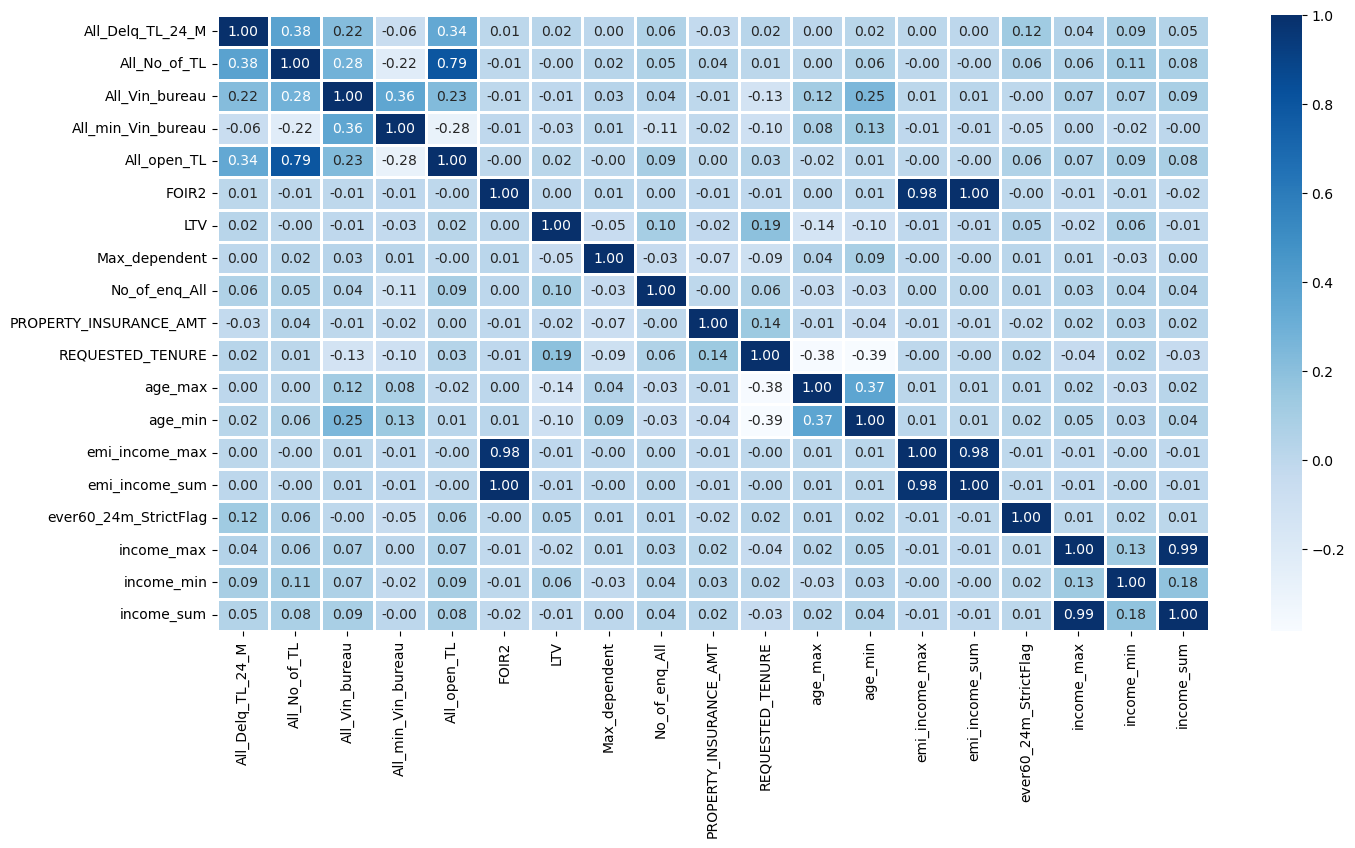

In [40]:
#Correlation matrix : to detect multicollinearity among input numerical features & dimensionality reduction.

correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix,
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            annot = True,
            fmt = '.2f',
            cmap = 'Blues',
            linewidth=1)
plt.show()

Columns with high correlation

'emi_income_max' & 'emi_income_sum' 

'income_max' & 'income_sum'

'FOIR' & 'emi_income_sum' 

In [42]:
#Dropping columns with high correlation and similar character

df.drop(['emi_income_max','income_max'], axis = 1, inplace = True)

In [45]:
df.shape

(13409, 31)

STUDY OF TARGET VARIABLE

In [48]:
#Target Variable
#ever60_24m_StrictFlag :  whether the applicant had any 60+ day delinquencies in the past 24 months.

print(df['ever60_24m_StrictFlag'].unique())

[0 1]


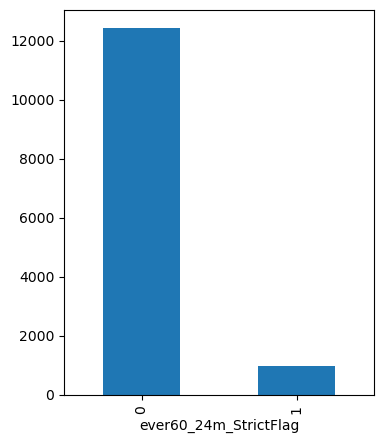

In [50]:
#Target classes count

plt.figure(figsize=(4,5))
df['ever60_24m_StrictFlag'].value_counts().plot(kind = 'bar')
plt.show()

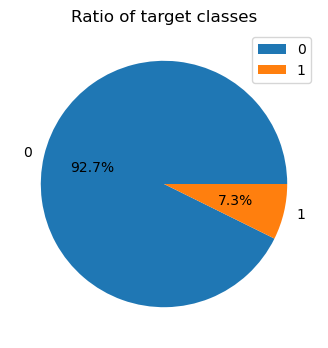

In [52]:
plt.figure(figsize = (6,4))
plt.pie( df['ever60_24m_StrictFlag'].value_counts(), labels = df['ever60_24m_StrictFlag'].value_counts().index,autopct='%1.1f%%')
plt.title("Ratio of target classes")
plt.legend()
plt.show()
        

Data is heavily imbalanced. So we need to handle data imbalance

STUDY OF CATEGORICAL VARIABLES

In [57]:
#Categorical columns

cat_cols = df.select_dtypes(include = 'object').columns
cat_cols = list(cat_cols)
cat_cols

['NATURE_OF_ORGANISATION',
 'OCCUPATION_TYPE',
 'Organization_type',
 'SALARIED_SELF',
 'CHANNEL_CODE',
 'Loan_sub_type_1',
 'SAL_FLAG',
 'Latest_Bureau_prd',
 'Bureau_TL']

In [59]:
#Adding categorical data in integer dtype 

combined_cat_cols = df[cat_cols + cat_int_cols].columns

In [61]:
combined_cat_cols

Index(['NATURE_OF_ORGANISATION', 'OCCUPATION_TYPE', 'Organization_type',
       'SALARIED_SELF', 'CHANNEL_CODE', 'Loan_sub_type_1', 'SAL_FLAG',
       'Latest_Bureau_prd', 'Bureau_TL', 'Doc_form_16', 'edu_max', 'edu_min',
       'cnt_coapplicant', 'City_tier'],
      dtype='object')

In [63]:
#Categorical variables and its unique values

for col in df[combined_cat_cols]:  
    print(f"\nColumn : {col}")
    print(f"\nUnique values ({df[col].nunique()}): ")
    print(df[col].unique())


Column : NATURE_OF_ORGANISATION

Unique values (14): 
['Private Ltd. Co.' 'Proprietor-Proprietorship Firm (Staff Less than 25)'
 'Others' 'MNC' 'Public Ltd. Co.' 'Government'
 'Proprietor-Proprietorship Firm (Staff More than 25)'
 'Self Employed Professional'
 'Partner-Partnership Firm (Staff More than 10 & Less than 25)'
 'Partner-Partnership Firm (Staff Less than 10)' nan
 'Partner-Partnership Firm (Staff More than 25)'
 'Director-Pvt. Ltd. Co. (Staff Less than 50)'
 'Director-Pvt. Ltd. Co. (Staff More than 50)' 'Public Sector Undertaking']

Column : OCCUPATION_TYPE

Unique values (61): 
['SALARIED' 'SELF-EMPLOYED' 'SERVICES' 'SERV-PRIVATE SECTOR' 'SALESMAN'
 'SAL(RETIRAL AGE 58)' 'MANUFACTURING' 'ATTORNEY AT LAW' 'TRADING'
 'GOVERNMENT SERVICE' 'PROPRIETOR' 'BUSINESSMAN' 'SERV-PUBLIC SECTOR'
 'SAL(RETIRAL AGE 60)' nan 'OTHERS' 'DIRECTOR' 'JEWELLER' 'OFFICER'
 'CONTRACTOR' 'ADVISOR' 'AGENT' 'OPERATOR' 'MANAGER'
 'DOCTOR-SELF EMPLOYED' 'JOURNALIST' 'INDUSTRY' 'ACCOUNTANT'
 'DOCTOR-SA

In [65]:
df[cat_cols].describe()

,NATURE_OF_ORGANISATION,OCCUPATION_TYPE,Organization_type,SALARIED_SELF,CHANNEL_CODE,Loan_sub_type_1,SAL_FLAG,Latest_Bureau_prd,Bureau_TL
count,13345,13340,13409,13409,13409,13409,13409,13409,13409
unique,14,61,5,3,8,5,2,12,12
top,Private Ltd. Co.,SALARIED,3.Private Ltd Co,SALARIED,CROSS SALES,Builder Ready,SAL,CL,10.<36 Others
freq,3489,5763,10113,7277,6212,4550,7277,2948,2341


TREATING NULL VALUES

In [70]:
df.isna().sum().sort_values(ascending = False)

FOIR2                     4565
LTV                        540
emi_income_sum             120
OCCUPATION_TYPE             69
NATURE_OF_ORGANISATION      64
income_sum                  25
income_min                  25
All_open_TL                  0
Loan_sub_type_1              0
SAL_FLAG                     0
All_No_of_TL                 0
ever60_24m_StrictFlag        0
All_Vin_bureau               0
City_tier                    0
All_Delq_TL_24_M             0
No_of_enq_All                0
Latest_Bureau_prd            0
All_min_Vin_bureau           0
Organization_type            0
CHANNEL_CODE                 0
SALARIED_SELF                0
PROPERTY_INSURANCE_AMT       0
REQUESTED_TENURE             0
cnt_coapplicant              0
age_min                      0
age_max                      0
edu_min                      0
edu_max                      0
Doc_form_16                  0
Max_dependent                0
Bureau_TL                    0
dtype: int64

FOIR2 is a critical column and has the most null values & hence need to be treated using imputation techniques.
But while checking correlation FOIR2 is highly correlated with emi_income_sum , so we can remove FOIR2 and keep emi_income_sum which has less null values

In [73]:
#Dropping FOIR2 column

df.drop('FOIR2', axis = 1, inplace = True)

In [75]:
df

,ever60_24m_StrictFlag,NATURE_OF_ORGANISATION,OCCUPATION_TYPE,Max_dependent,LTV,Doc_form_16,income_sum,income_min,edu_max,edu_min,age_max,age_min,cnt_coapplicant,REQUESTED_TENURE,PROPERTY_INSURANCE_AMT,Organization_type,SALARIED_SELF,CHANNEL_CODE,City_tier,Loan_sub_type_1,SAL_FLAG,emi_income_sum,All_No_of_TL,All_open_TL,All_Vin_bureau,All_min_Vin_bureau,All_Delq_TL_24_M,No_of_enq_All,Latest_Bureau_prd,Bureau_TL
0,0,Private Ltd. Co.,SALARIED,0,0.715563,0,11396.0000,0.0,3,2,46,24,1,240.0,4553.0,3.Private Ltd Co,SALARIED,DSA,1,Builder Ready,SAL,0.456037,4,2,32,2,0,8,CC,2.<6 CC
1,0,Proprietor-Proprietorship Firm (Staff Less tha...,SELF-EMPLOYED,2,0.544463,0,26472.0833,0.0,3,3,47,44,1,180.0,10307.0,3.Private Ltd Co,SELF_EMP,DSA,3,Self Construction,NONSAL,0.472611,3,1,65,19,2,3,HL,7.<36 AL HL LAS
2,0,Proprietor-Proprietorship Firm (Staff Less tha...,SERVICES,6,0.566012,0,23487.5000,0.0,3,3,35,35,1,240.0,7460.0,3.Private Ltd Co,SELF_EMP,CROSS SALES,3,Self Construction,NONSAL,0.486684,2,2,47,37,0,2,BL_PSL,12.>36 PL TWL GL
3,0,Others,SALARIED,0,0.536455,0,42270.0000,0.0,3,3,39,34,1,240.0,6744.0,1.Others,SALARIED,DSA,1,Builder UNC,SAL,0.447599,2,1,94,69,0,2,AL,13.>36 Others
4,0,Private Ltd. Co.,SERV-PRIVATE SECTOR,1,0.511949,0,17506.0000,0.0,3,3,32,28,1,324.0,0.0,3.Private Ltd Co,SALARIED,UBL Sales,1,Builder Ready,SAL,0.619159,1,0,87,87,0,2,CC,11.>36 CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13404,0,Public Ltd. Co.,SALARIED,3,0.797220,0,41202.0000,0.0,3,2,29,29,1,240.0,35343.0,4.Public Ltd. Co.,SALARIED,CROSS SALES,1,Resale Ready,SAL,0.307412,1,0,39,39,0,3,CL,13.>36 Others
13405,0,Proprietor-Proprietorship Firm (Staff Less tha...,SALARIED,1,0.799787,0,61858.0000,0.0,3,3,32,31,1,240.0,0.0,3.Private Ltd Co,SALARIED,DSA,3,Builder Ready,SAL,0.460021,4,2,49,4,0,7,CL,4.<6 BL CL Oth
13406,0,Proprietor-Proprietorship Firm (Staff More tha...,TRADING,0,0.506137,0,30616.6850,0.0,2,2,50,46,1,180.0,5597.0,3.Private Ltd Co,SELF_EMP,UBL Sales,2,Resale Ready,NONSAL,0.440446,1,1,50,50,0,1,HL,13.>36 Others
13407,0,Proprietor-Proprietorship Firm (Staff More tha...,TRADING,0,0.155070,0,30616.6850,0.0,2,2,50,46,1,156.0,0.0,3.Private Ltd Co,SELF_EMP,UBL Sales,2,Resale Ready,NONSAL,0.145836,1,1,50,50,0,1,HL,13.>36 Others


In [77]:
#Considering minimum net monthly income of 10,000 is required for loan eligibility

df = df[df['income_sum']>= 10000]
df

,ever60_24m_StrictFlag,NATURE_OF_ORGANISATION,OCCUPATION_TYPE,Max_dependent,LTV,Doc_form_16,income_sum,income_min,edu_max,edu_min,age_max,age_min,cnt_coapplicant,REQUESTED_TENURE,PROPERTY_INSURANCE_AMT,Organization_type,SALARIED_SELF,CHANNEL_CODE,City_tier,Loan_sub_type_1,SAL_FLAG,emi_income_sum,All_No_of_TL,All_open_TL,All_Vin_bureau,All_min_Vin_bureau,All_Delq_TL_24_M,No_of_enq_All,Latest_Bureau_prd,Bureau_TL
0,0,Private Ltd. Co.,SALARIED,0,0.715563,0,11396.0000,0.0,3,2,46,24,1,240.0,4553.0,3.Private Ltd Co,SALARIED,DSA,1,Builder Ready,SAL,0.456037,4,2,32,2,0,8,CC,2.<6 CC
1,0,Proprietor-Proprietorship Firm (Staff Less tha...,SELF-EMPLOYED,2,0.544463,0,26472.0833,0.0,3,3,47,44,1,180.0,10307.0,3.Private Ltd Co,SELF_EMP,DSA,3,Self Construction,NONSAL,0.472611,3,1,65,19,2,3,HL,7.<36 AL HL LAS
2,0,Proprietor-Proprietorship Firm (Staff Less tha...,SERVICES,6,0.566012,0,23487.5000,0.0,3,3,35,35,1,240.0,7460.0,3.Private Ltd Co,SELF_EMP,CROSS SALES,3,Self Construction,NONSAL,0.486684,2,2,47,37,0,2,BL_PSL,12.>36 PL TWL GL
3,0,Others,SALARIED,0,0.536455,0,42270.0000,0.0,3,3,39,34,1,240.0,6744.0,1.Others,SALARIED,DSA,1,Builder UNC,SAL,0.447599,2,1,94,69,0,2,AL,13.>36 Others
4,0,Private Ltd. Co.,SERV-PRIVATE SECTOR,1,0.511949,0,17506.0000,0.0,3,3,32,28,1,324.0,0.0,3.Private Ltd Co,SALARIED,UBL Sales,1,Builder Ready,SAL,0.619159,1,0,87,87,0,2,CC,11.>36 CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13404,0,Public Ltd. Co.,SALARIED,3,0.797220,0,41202.0000,0.0,3,2,29,29,1,240.0,35343.0,4.Public Ltd. Co.,SALARIED,CROSS SALES,1,Resale Ready,SAL,0.307412,1,0,39,39,0,3,CL,13.>36 Others
13405,0,Proprietor-Proprietorship Firm (Staff Less tha...,SALARIED,1,0.799787,0,61858.0000,0.0,3,3,32,31,1,240.0,0.0,3.Private Ltd Co,SALARIED,DSA,3,Builder Ready,SAL,0.460021,4,2,49,4,0,7,CL,4.<6 BL CL Oth
13406,0,Proprietor-Proprietorship Firm (Staff More tha...,TRADING,0,0.506137,0,30616.6850,0.0,2,2,50,46,1,180.0,5597.0,3.Private Ltd Co,SELF_EMP,UBL Sales,2,Resale Ready,NONSAL,0.440446,1,1,50,50,0,1,HL,13.>36 Others
13407,0,Proprietor-Proprietorship Firm (Staff More tha...,TRADING,0,0.155070,0,30616.6850,0.0,2,2,50,46,1,156.0,0.0,3.Private Ltd Co,SELF_EMP,UBL Sales,2,Resale Ready,NONSAL,0.145836,1,1,50,50,0,1,HL,13.>36 Others


In [79]:
df.isna().sum().sort_values(ascending = False)[:7]

LTV                       489
emi_income_sum             59
OCCUPATION_TYPE            47
NATURE_OF_ORGANISATION     42
ever60_24m_StrictFlag       0
CHANNEL_CODE                0
Latest_Bureau_prd           0
dtype: int64

In [81]:
#emi_income_sum	: EMI-related ratios to income (Emi / Income)
#Ratios like EMI/Income should logically fall between 0 and 1.

df=df[df['emi_income_sum'].between(0,1)]

In [83]:
df

,ever60_24m_StrictFlag,NATURE_OF_ORGANISATION,OCCUPATION_TYPE,Max_dependent,LTV,Doc_form_16,income_sum,income_min,edu_max,edu_min,age_max,age_min,cnt_coapplicant,REQUESTED_TENURE,PROPERTY_INSURANCE_AMT,Organization_type,SALARIED_SELF,CHANNEL_CODE,City_tier,Loan_sub_type_1,SAL_FLAG,emi_income_sum,All_No_of_TL,All_open_TL,All_Vin_bureau,All_min_Vin_bureau,All_Delq_TL_24_M,No_of_enq_All,Latest_Bureau_prd,Bureau_TL
0,0,Private Ltd. Co.,SALARIED,0,0.715563,0,11396.0000,0.0,3,2,46,24,1,240.0,4553.0,3.Private Ltd Co,SALARIED,DSA,1,Builder Ready,SAL,0.456037,4,2,32,2,0,8,CC,2.<6 CC
1,0,Proprietor-Proprietorship Firm (Staff Less tha...,SELF-EMPLOYED,2,0.544463,0,26472.0833,0.0,3,3,47,44,1,180.0,10307.0,3.Private Ltd Co,SELF_EMP,DSA,3,Self Construction,NONSAL,0.472611,3,1,65,19,2,3,HL,7.<36 AL HL LAS
2,0,Proprietor-Proprietorship Firm (Staff Less tha...,SERVICES,6,0.566012,0,23487.5000,0.0,3,3,35,35,1,240.0,7460.0,3.Private Ltd Co,SELF_EMP,CROSS SALES,3,Self Construction,NONSAL,0.486684,2,2,47,37,0,2,BL_PSL,12.>36 PL TWL GL
3,0,Others,SALARIED,0,0.536455,0,42270.0000,0.0,3,3,39,34,1,240.0,6744.0,1.Others,SALARIED,DSA,1,Builder UNC,SAL,0.447599,2,1,94,69,0,2,AL,13.>36 Others
4,0,Private Ltd. Co.,SERV-PRIVATE SECTOR,1,0.511949,0,17506.0000,0.0,3,3,32,28,1,324.0,0.0,3.Private Ltd Co,SALARIED,UBL Sales,1,Builder Ready,SAL,0.619159,1,0,87,87,0,2,CC,11.>36 CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13404,0,Public Ltd. Co.,SALARIED,3,0.797220,0,41202.0000,0.0,3,2,29,29,1,240.0,35343.0,4.Public Ltd. Co.,SALARIED,CROSS SALES,1,Resale Ready,SAL,0.307412,1,0,39,39,0,3,CL,13.>36 Others
13405,0,Proprietor-Proprietorship Firm (Staff Less tha...,SALARIED,1,0.799787,0,61858.0000,0.0,3,3,32,31,1,240.0,0.0,3.Private Ltd Co,SALARIED,DSA,3,Builder Ready,SAL,0.460021,4,2,49,4,0,7,CL,4.<6 BL CL Oth
13406,0,Proprietor-Proprietorship Firm (Staff More tha...,TRADING,0,0.506137,0,30616.6850,0.0,2,2,50,46,1,180.0,5597.0,3.Private Ltd Co,SELF_EMP,UBL Sales,2,Resale Ready,NONSAL,0.440446,1,1,50,50,0,1,HL,13.>36 Others
13407,0,Proprietor-Proprietorship Firm (Staff More tha...,TRADING,0,0.155070,0,30616.6850,0.0,2,2,50,46,1,156.0,0.0,3.Private Ltd Co,SELF_EMP,UBL Sales,2,Resale Ready,NONSAL,0.145836,1,1,50,50,0,1,HL,13.>36 Others


In [85]:
df.isna().sum().sort_values(ascending = False)[:7]

LTV                       415
OCCUPATION_TYPE            46
NATURE_OF_ORGANISATION     41
ever60_24m_StrictFlag       0
CHANNEL_CODE                0
Latest_Bureau_prd           0
No_of_enq_All               0
dtype: int64

Most of the null values have been removed by basic techniques

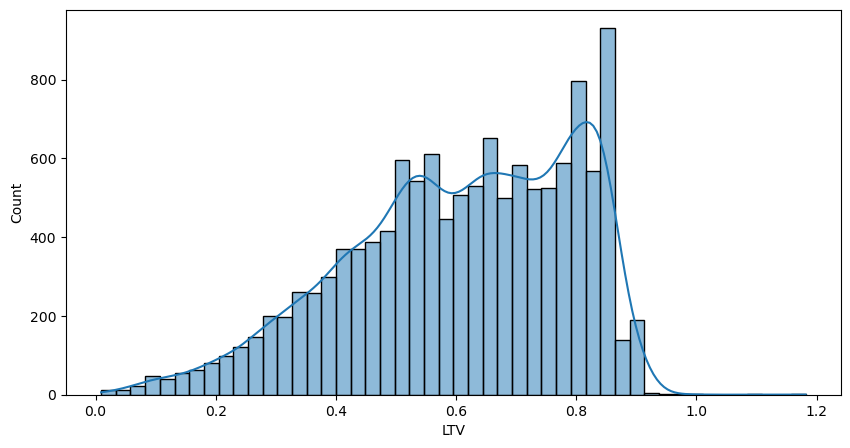

In [88]:
#LTV Distribution

plt.figure(figsize=(10,5))
sns.histplot(df['LTV'], kde = True)
plt.show()

Distribution of LTV is left skewed.

In [91]:
#We use median imputation method for skewed data

df['LTV'] = df['LTV'].fillna(df['LTV'].median())

In [93]:
df.isna().sum().sort_values(ascending = False)[:7]

OCCUPATION_TYPE           46
NATURE_OF_ORGANISATION    41
ever60_24m_StrictFlag      0
SALARIED_SELF              0
Latest_Bureau_prd          0
No_of_enq_All              0
All_Delq_TL_24_M           0
dtype: int64

In [95]:
#Cramer’s V correlation to measure the association between two categorical attributes

from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

In [97]:
#Checking correlation between columns 'Organization_type' & 'NATURE_OF_ORGANISATION' usinf Cramer’s V method

cramers_v(df['Organization_type'], df['NATURE_OF_ORGANISATION'])

1.0

In [99]:
#Cross-tabulation between columns 'Organization_type' & 'NATURE_OF_ORGANISATION'  

pd.crosstab(df['Organization_type'], df['NATURE_OF_ORGANISATION'])

NATURE_OF_ORGANISATION,Director-Pvt. Ltd. Co. (Staff Less than 50),Director-Pvt. Ltd. Co. (Staff More than 50),Government,MNC,Others,Partner-Partnership Firm (Staff Less than 10),Partner-Partnership Firm (Staff More than 10 & Less than 25),Partner-Partnership Firm (Staff More than 25),Private Ltd. Co.,Proprietor-Proprietorship Firm (Staff Less than 25),Proprietor-Proprietorship Firm (Staff More than 25),Public Ltd. Co.,Public Sector Undertaking,Self Employed Professional
Organization_type,,,,,,,,,,,,,,
1.Others,0,0,0,0,765,0,0,0,0,0,0,0,0,210
2.Govt,0,0,1276,0,0,0,0,0,0,0,0,0,10,0
3.Private Ltd Co,140,18,0,0,0,80,107,224,3426,3392,2527,0,0,0
4.Public Ltd. Co.,0,0,0,0,0,0,0,0,0,0,0,751,0,0
5.MNC,0,0,0,142,0,0,0,0,0,0,0,0,0,0


Both these columns are highly associated. Categories in 'NATURE_OF_ORGANISATION are already mapped in Organization_type column. Hence we can remove NATURE_OF_ORGANISATION 

In [102]:
df.drop('NATURE_OF_ORGANISATION', axis = 1, inplace = True)

In [104]:
df.isna().sum().sort_values(ascending = False)[:7]

OCCUPATION_TYPE          46
ever60_24m_StrictFlag     0
SALARIED_SELF             0
Latest_Bureau_prd         0
No_of_enq_All             0
All_Delq_TL_24_M          0
All_min_Vin_bureau        0
dtype: int64

In [106]:
#Checking correlation between columns 'Organization_type' & 'NATURE_OF_ORGANISATION' using Cramer’s V method

cramers_v(df['OCCUPATION_TYPE'], df['SALARIED_SELF'])

0.6992629049559279

In [108]:
#Cross-tabulation between columns 'OCCUPATION_TYPE' & 'SALARIED_SELF'

pd.crosstab(df['OCCUPATION_TYPE'],['SALARIED_SELF'])

col_0,SALARIED_SELF
OCCUPATION_TYPE,
ACCOUNTANT,9
ADMINSTRATOR,2
ADVISOR,4
AGENT,22
AGRICULTURIST,1
...,...
TAXI DRIVER,2
TEACHER,9
TECHNICIAN,2


Both these columns are highly associated. Categories in OCCUPATION_TYPE are already mapped in SALARIED_SELF column. Hence we can remove OCCUPATION_TYPE

In [111]:
df.drop('OCCUPATION_TYPE',axis = 1, inplace = True)

In [113]:
df.isna().sum().sort_values(ascending = False)[:7]

ever60_24m_StrictFlag    0
Max_dependent            0
Latest_Bureau_prd        0
No_of_enq_All            0
All_Delq_TL_24_M         0
All_min_Vin_bureau       0
All_Vin_bureau           0
dtype: int64

All the null values have been removed

DATAFRAME AFTER REMOVING NULL VALUES

In [118]:
df.head()

,ever60_24m_StrictFlag,Max_dependent,LTV,Doc_form_16,income_sum,income_min,edu_max,edu_min,age_max,age_min,cnt_coapplicant,REQUESTED_TENURE,PROPERTY_INSURANCE_AMT,Organization_type,SALARIED_SELF,CHANNEL_CODE,City_tier,Loan_sub_type_1,SAL_FLAG,emi_income_sum,All_No_of_TL,All_open_TL,All_Vin_bureau,All_min_Vin_bureau,All_Delq_TL_24_M,No_of_enq_All,Latest_Bureau_prd,Bureau_TL
0,0,0,0.715563,0,11396.0000,0.0,3,2,46,24,1,240.0,4553.0,3.Private Ltd Co,SALARIED,DSA,1,Builder Ready,SAL,0.456037,4,2,32,2,0,8,CC,2.<6 CC
1,0,2,0.544463,0,26472.0833,0.0,3,3,47,44,1,180.0,10307.0,3.Private Ltd Co,SELF_EMP,DSA,3,Self Construction,NONSAL,0.472611,3,1,65,19,2,3,HL,7.<36 AL HL LAS
2,0,6,0.566012,0,23487.5000,0.0,3,3,35,35,1,240.0,7460.0,3.Private Ltd Co,SELF_EMP,CROSS SALES,3,Self Construction,NONSAL,0.486684,2,2,47,37,0,2,BL_PSL,12.>36 PL TWL GL
3,0,0,0.536455,0,42270.0000,0.0,3,3,39,34,1,240.0,6744.0,1.Others,SALARIED,DSA,1,Builder UNC,SAL,0.447599,2,1,94,69,0,2,AL,13.>36 Others
4,0,1,0.511949,0,17506.0000,0.0,3,3,32,28,1,324.0,0.0,3.Private Ltd Co,SALARIED,UBL Sales,1,Builder Ready,SAL,0.619159,1,0,87,87,0,2,CC,11.>36 CC


In [120]:
df.shape

(13109, 28)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13109 entries, 0 to 13408
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ever60_24m_StrictFlag   13109 non-null  int64  
 1   Max_dependent           13109 non-null  int64  
 2   LTV                     13109 non-null  float64
 3   Doc_form_16             13109 non-null  int64  
 4   income_sum              13109 non-null  float64
 5   income_min              13109 non-null  float64
 6   edu_max                 13109 non-null  int64  
 7   edu_min                 13109 non-null  int64  
 8   age_max                 13109 non-null  int64  
 9   age_min                 13109 non-null  int64  
 10  cnt_coapplicant         13109 non-null  int64  
 11  REQUESTED_TENURE        13109 non-null  float64
 12  PROPERTY_INSURANCE_AMT  13109 non-null  float64
 13  Organization_type       13109 non-null  object 
 14  SALARIED_SELF           13109 non-null  obj

In [124]:
#Remaining Numerical columns after performing all null value treatment

num_cols  = df.select_dtypes(include = ['number']).columns.difference(cat_int_cols)
num_cols = list(num_cols)
num_cols

['All_Delq_TL_24_M',
 'All_No_of_TL',
 'All_Vin_bureau',
 'All_min_Vin_bureau',
 'All_open_TL',
 'LTV',
 'Max_dependent',
 'No_of_enq_All',
 'PROPERTY_INSURANCE_AMT',
 'REQUESTED_TENURE',
 'age_max',
 'age_min',
 'emi_income_sum',
 'ever60_24m_StrictFlag',
 'income_min',
 'income_sum']

DISTRIBUTION OF CONTINUOUS NUMERICAL COLUMNS FOR EVALUATING SKEWNESS OF DATA

In [128]:
df[num_cols].nunique().sort_values(ascending = False)

emi_income_sum            13023
LTV                       11503
income_sum                10485
PROPERTY_INSURANCE_AMT     4651
income_min                 1975
All_Vin_bureau              220
All_min_Vin_bureau          157
No_of_enq_All                84
REQUESTED_TENURE             72
age_max                      60
All_No_of_TL                 55
age_min                      45
All_open_TL                  28
All_Delq_TL_24_M             16
Max_dependent                15
ever60_24m_StrictFlag         2
dtype: int64

In [130]:
#We use columns with high cardinality as continuous columns

cont_num_cols = ['emi_income_sum','LTV','income_sum','PROPERTY_INSURANCE_AMT','income_min','All_Vin_bureau','All_min_Vin_bureau']


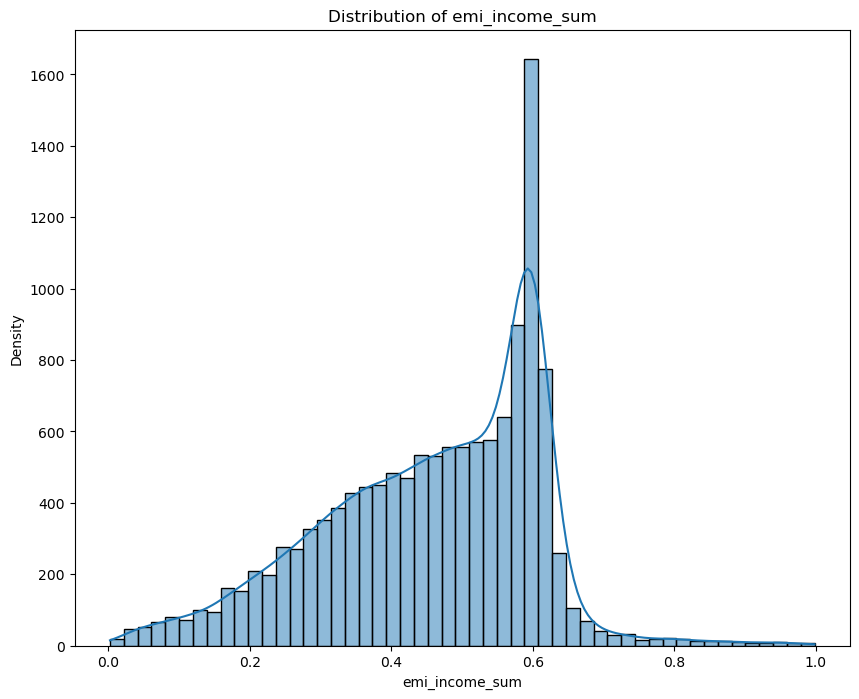

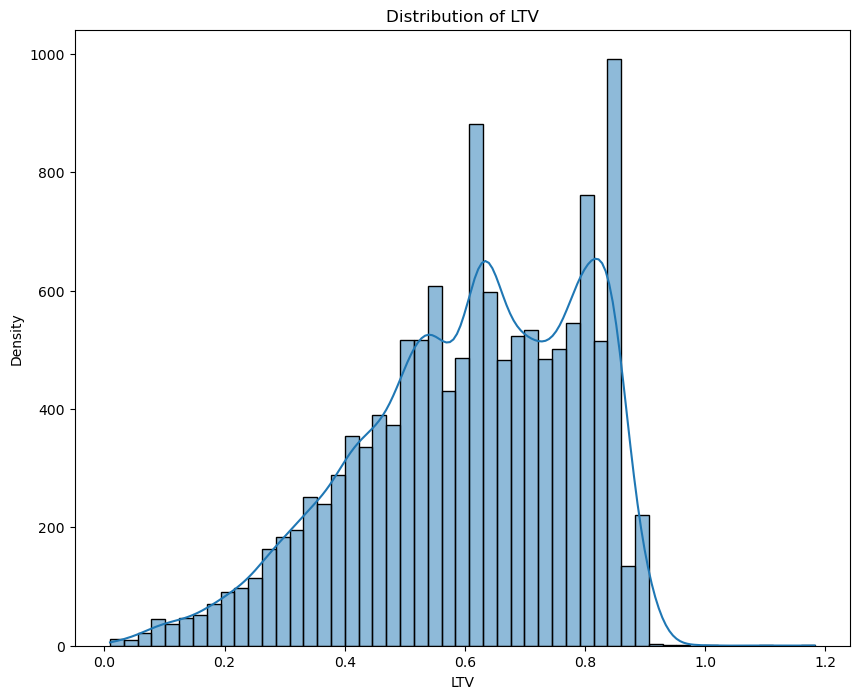

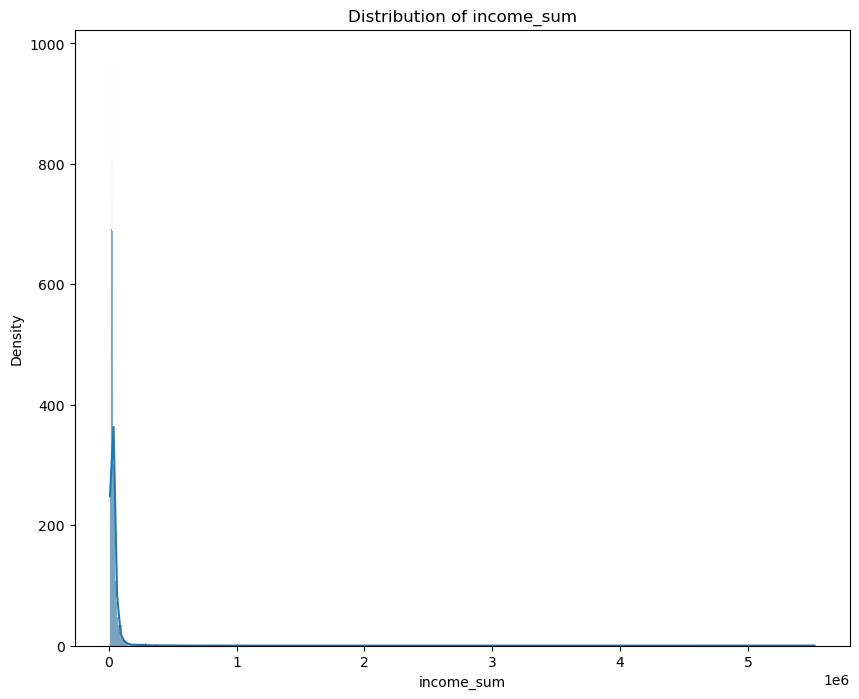

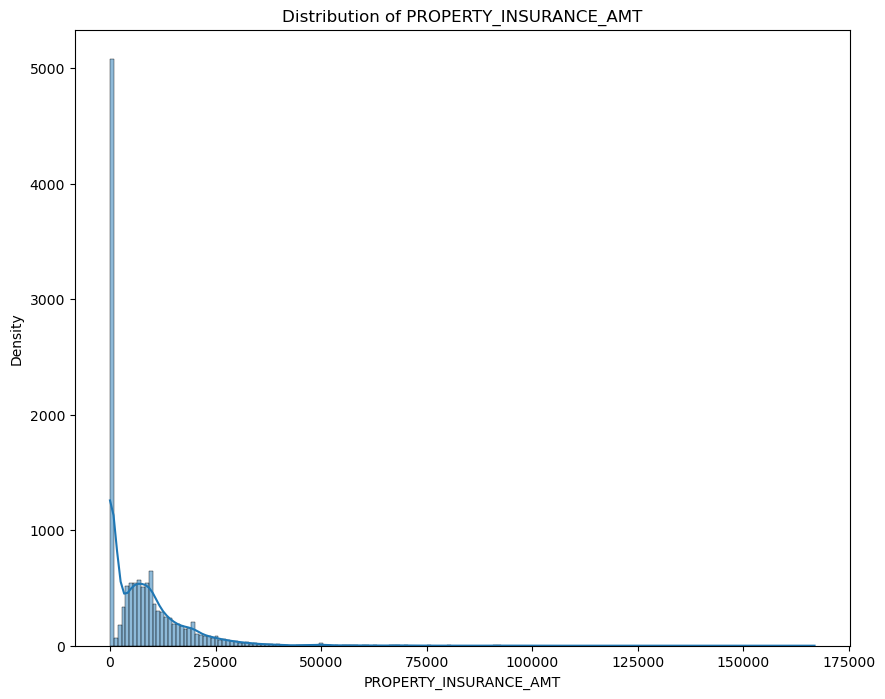

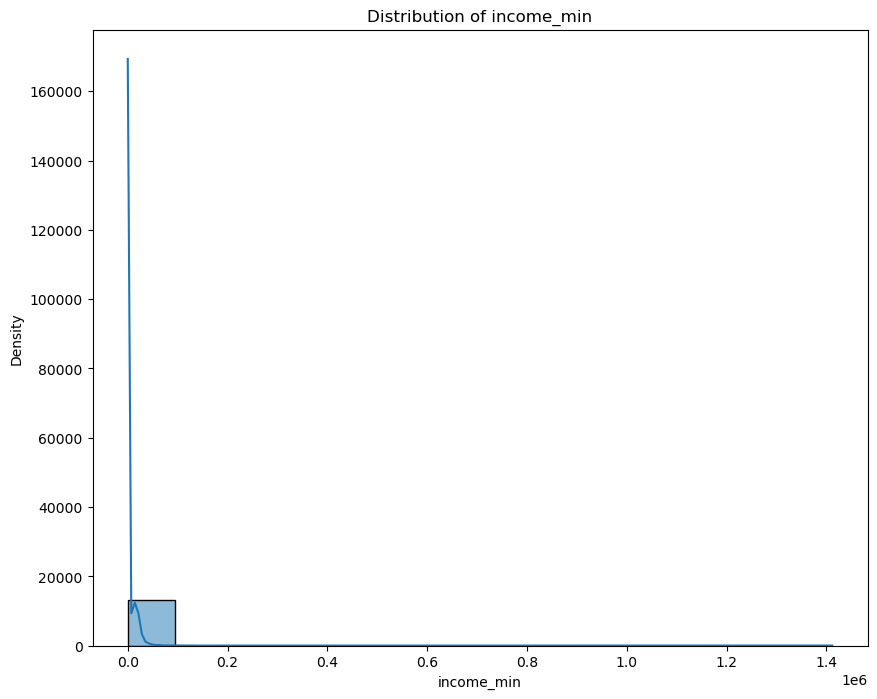

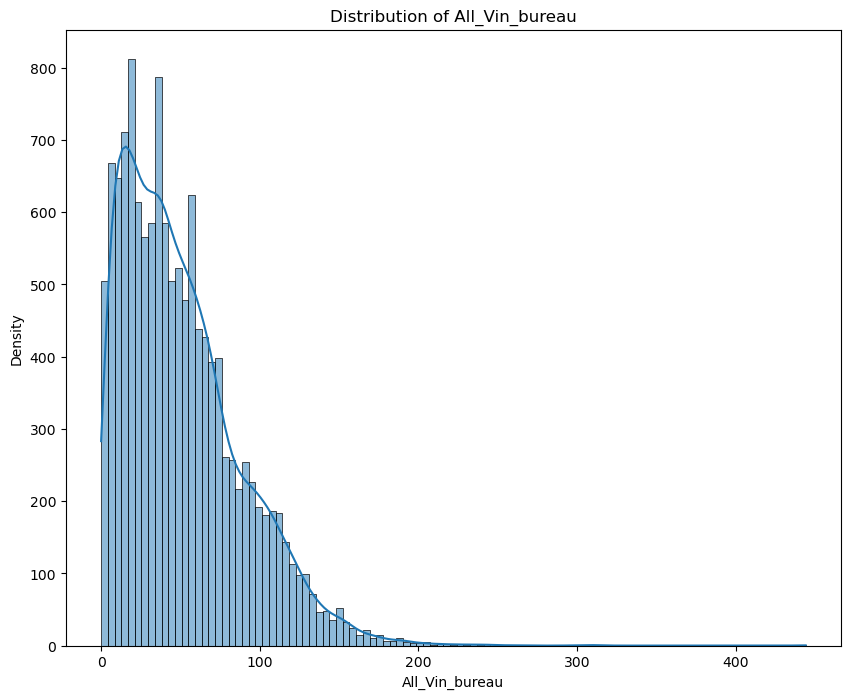

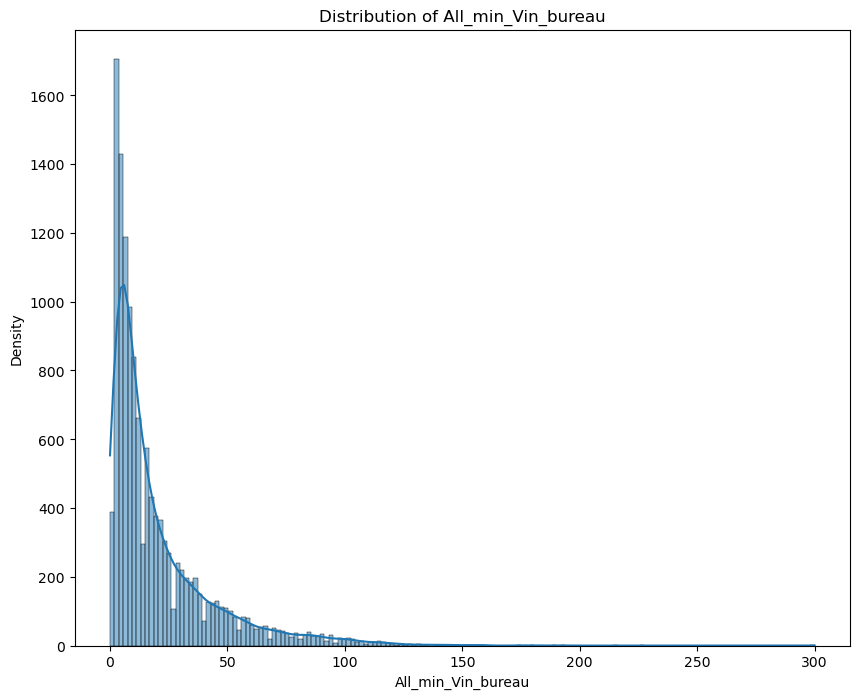

In [132]:
#PLoting Distribution 

for i in cont_num_cols:
    plt.figure(figsize=(10,8))
    fig = sns.histplot(df[i],kde = True)
    fig.set_ylabel('Density')
    fig.set_xlabel(i)
    plt.title(f"Distribution of {i}")
    plt.tight_layout
    plt.show()

In [133]:
#Checking skewed columns

skewed=[]
for i in cont_num_cols:
    if df[i].skew() < -0.5 or df[i].skew() > 0.5:
        skewed.append(i)

skewed

['LTV',
 'income_sum',
 'PROPERTY_INSURANCE_AMT',
 'income_min',
 'All_Vin_bureau',
 'All_min_Vin_bureau']

OUTLIER DETECTION

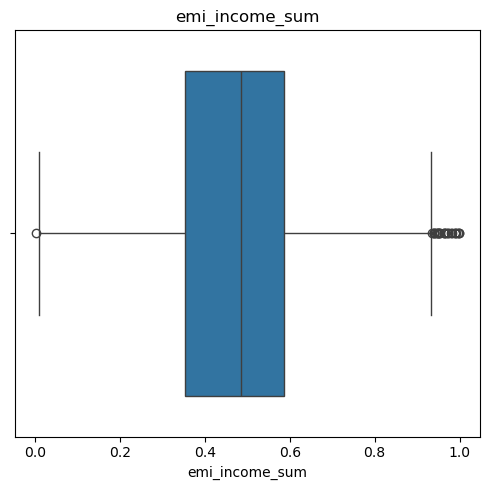

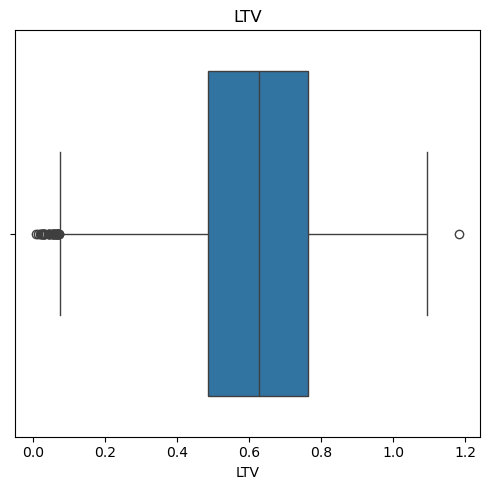

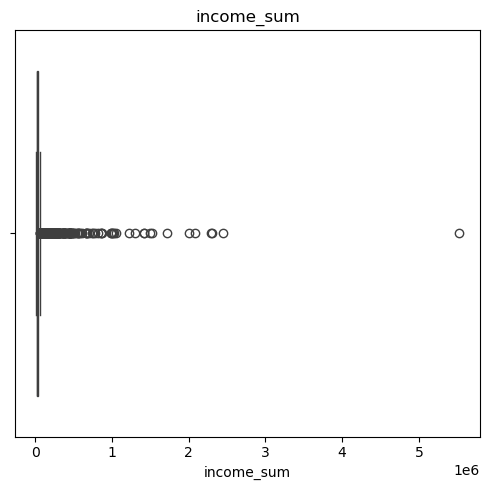

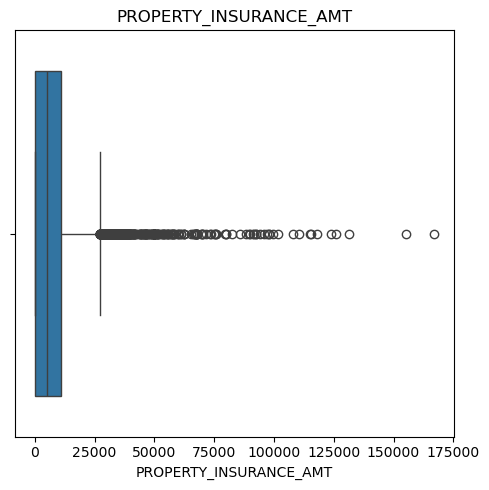

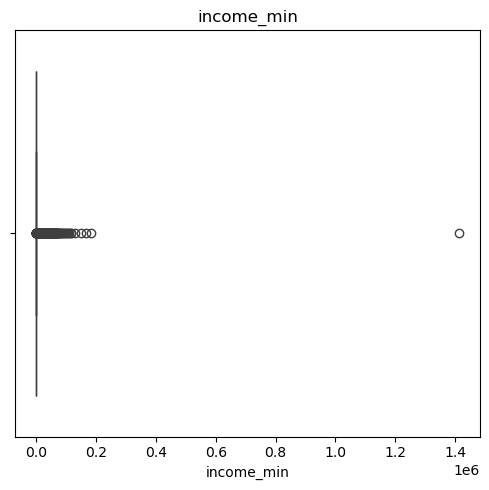

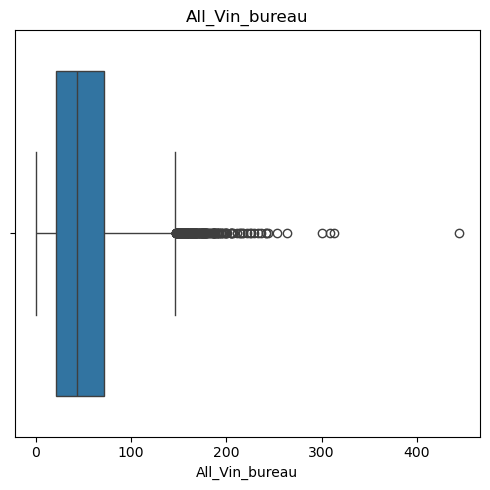

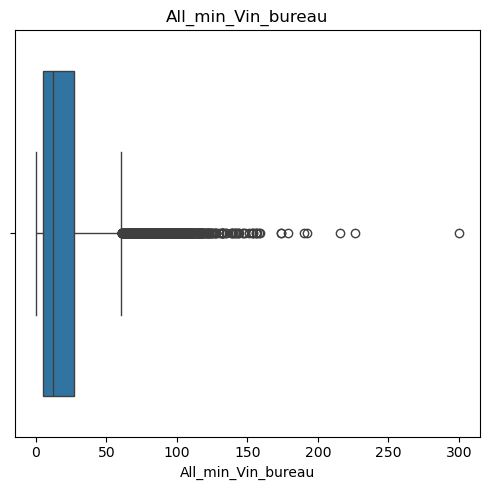

In [136]:
#Box PLot

for col in cont_num_cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(x = df[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [137]:
#Finding outliers info using IQR Method

outlier_info = {}

for col in cont_num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    outlier_info[col] = {
        'Lower limit': lower_limit,
        'Upper limit': upper_limit,
        'Outlier count': len(outliers)
    }

for col,info in outlier_info.items():
    print(f"\n{col} : \n Number of outliers : {info['Outlier count']}")
    print(f" Outlier info : \n Lower Limit : {info['Lower limit']} \n Upper limit : {info['Upper limit']}")


emi_income_sum : 
 Number of outliers : 26
 Outlier info : 
 Lower Limit : 0.005546264500000009 
 Upper limit : 0.9336594524999999

LTV : 
 Number of outliers : 39
 Outlier info : 
 Lower Limit : 0.07338796750000004 
 Upper limit : 1.1768320195

income_sum : 
 Number of outliers : 964
 Outlier info : 
 Lower Limit : -5862.875 
 Upper limit : 68444.125

PROPERTY_INSURANCE_AMT : 
 Number of outliers : 487
 Outlier info : 
 Lower Limit : -16278.0 
 Upper limit : 27130.0

income_min : 
 Number of outliers : 2718
 Outlier info : 
 Lower Limit : 0.0 
 Upper limit : 0.0

All_Vin_bureau : 
 Number of outliers : 242
 Outlier info : 
 Lower Limit : -54.0 
 Upper limit : 146.0

All_min_Vin_bureau : 
 Number of outliers : 905
 Outlier info : 
 Lower Limit : -28.0 
 Upper limit : 60.0


We should always Treat Outliers First, Then Handle Skewness.

Outliers can distort skewness statistics significantly.
If you transform a skewed distribution before removing outliers, the transformation may overcompensate or fail due to extreme values.
By handling outliers first, your skewness reflects the true distribution of most of your data

TREATING OUTLIERS AND SKEWNESS OF CONTINUOUS NUMERICAL COLUMNS

emi_income_sum

-0.4720892633801039

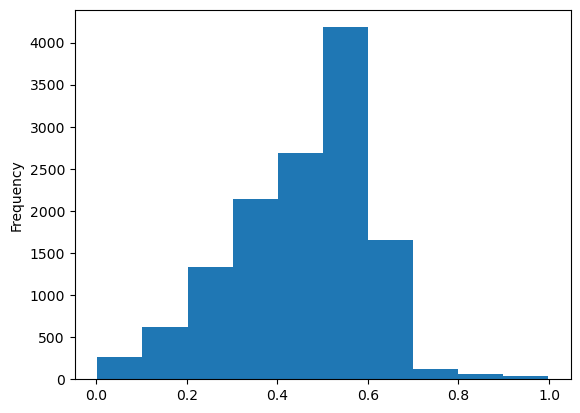

In [147]:
#Skewness before outlier removal

df['emi_income_sum'].plot(kind = 'hist')
df['emi_income_sum'].skew()

Data is approximately symmetric. No need to transform

LTV

-0.5418547840974632

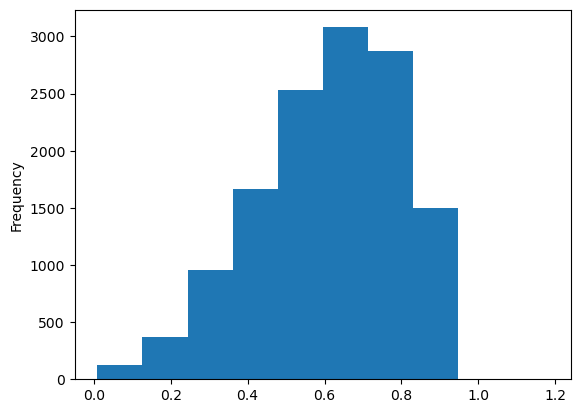

In [151]:
#Skewness before outlier removal

df['LTV'].plot(kind='hist')
df['LTV'].skew()

In [153]:
#Removing rows with LTV greater than 1 since Loan to Value of Property ratio cannot be above than 1

df=df[df['LTV']<1]

In [155]:
#Applying quantile-based capping using the 1st and 99th percentiles for the LTV (Loan-to-Value) ratio.This is a robust and preferred method when:
#You want to reduce the influence of extreme values without deleting data.
#Outliers may be informative (e.g., high LTV may correlate with default).

q1 = df['LTV'].quantile(0.01)
q99 = df['LTV'].quantile(0.99)
df['LTV_capped'] = df['LTV'].clip(lower=q1, upper=q99)

-0.511425397782636

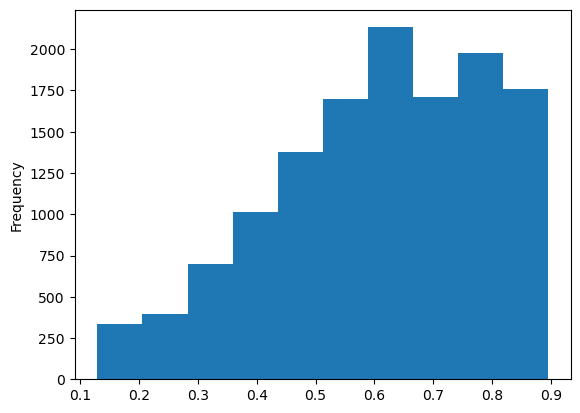

In [157]:
#Skewness after outlier removal

df['LTV_capped'].plot(kind='hist')
df['LTV_capped'].skew()

In [159]:
#Square Transformation

df['LTV_sq'] = df['LTV_capped'] ** 2

0.04865370838795413

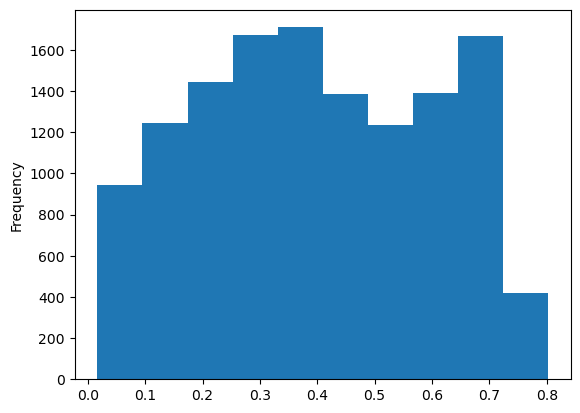

In [161]:
#Skewness after transformation

df['LTV_sq'].plot(kind = 'hist')
df['LTV_sq'].skew()

Data is now approximately symmetric

income_sum

30.162312068674066

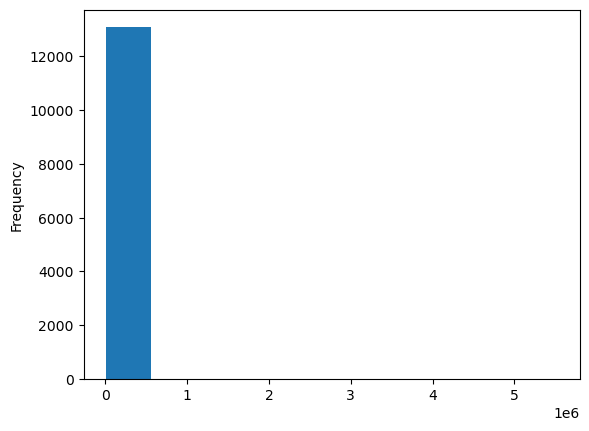

In [165]:
#Skewness before outlier removal

df['income_sum'].plot(kind = 'hist')
df['income_sum'].skew()

In [167]:
#Lower limit is negative and income cannot be negative. So removing negative values

df = df[df['income_sum'] >= 0]

In [169]:
#Applying quantile-based capping since there may be cases where individuals can have high income

q1 = df['income_sum'].quantile(0.01)
q99 = df['income_sum'].quantile(0.99)
df['income_sum_q_capped'] = df['income_sum'].clip(lower=q1, upper=q99)

4.009198746194967

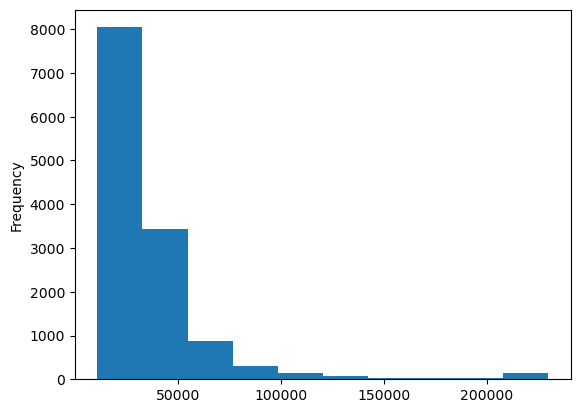

In [171]:
#Skewness after outlier removal

df['income_sum_q_capped'].plot(kind = 'hist')
df['income_sum_q_capped'].skew()

In [173]:
#Log Transformation on quantile based capped data

df['LOG_income_sum_q_capped'] = np.log1p(df['income_sum_q_capped'])

0.9403831092550871

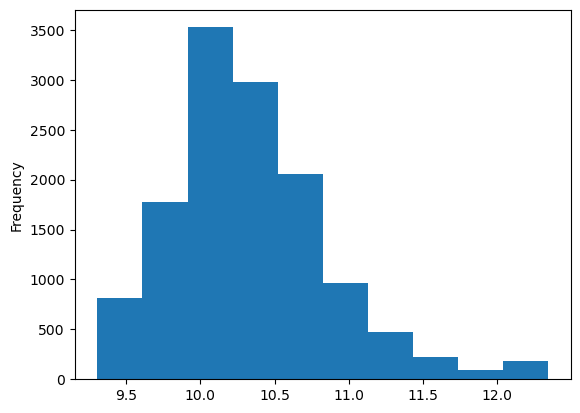

In [175]:
#Skewness after transformation

df['LOG_income_sum_q_capped'].plot(kind = 'hist')
df['LOG_income_sum_q_capped'].skew()

Data is still mildly right-skewed

In [178]:
#Applying IQR based capping

Q1 = df['income_sum'].quantile(0.25)
Q3 = df['income_sum'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['income_sum'] >= lower_limit) & (df['income_sum'] <= upper_limit)]

0.8435735010351871

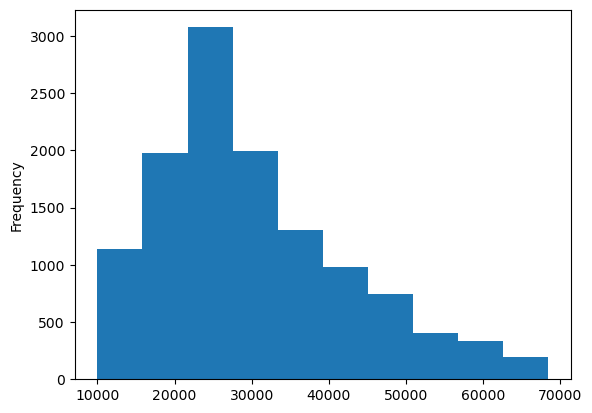

In [180]:
df['income_sum'].plot(kind = 'hist')
df['income_sum'].skew()

In [182]:
#Log Transformation on IQR based capped data

df['LOG_income_sum'] = np.log1p(df['income_sum'])

-0.05471297606807578

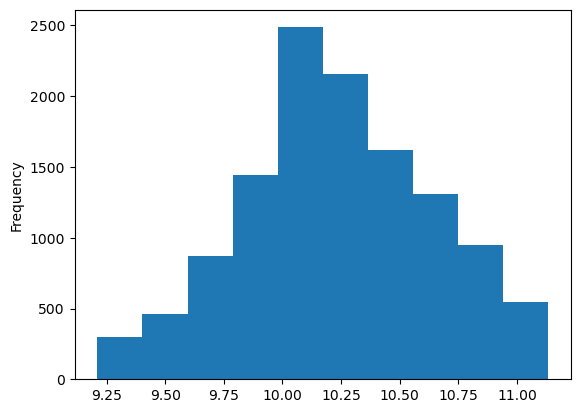

In [184]:
#Skewness after transformation

df['LOG_income_sum'].plot(kind = 'hist')
df['LOG_income_sum'].skew()

Data is now approximately symmetric

PROPERTY_INSURANCE_AMOUNT

3.490632061195955

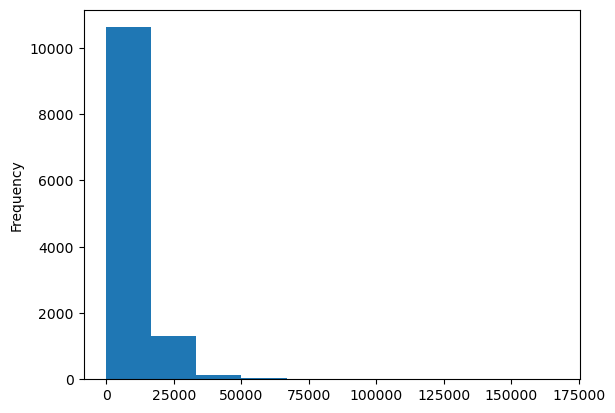

In [188]:
df['PROPERTY_INSURANCE_AMT'].plot(kind='hist')
df['PROPERTY_INSURANCE_AMT'].skew()

In [190]:
#Applying quantile-based capping

q1 = df['PROPERTY_INSURANCE_AMT'].quantile(0.01)
q99 = df['PROPERTY_INSURANCE_AMT'].quantile(0.99)

df['PROPERTY_INSURANCE_AMT'] = df['PROPERTY_INSURANCE_AMT'].clip(lower=q1, upper=q99)

<Axes: ylabel='Frequency'>

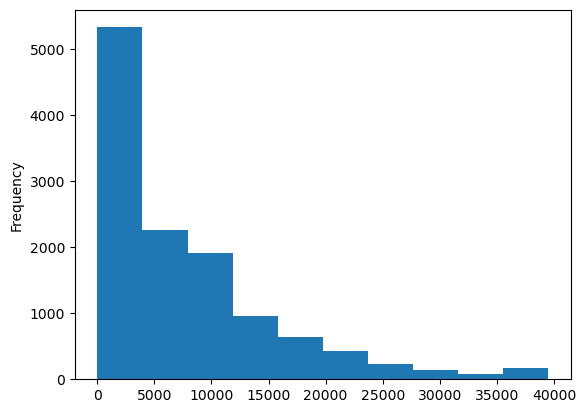

In [192]:
df['PROPERTY_INSURANCE_AMT'].plot(kind='hist')

In [194]:
df['LOG_PROPERTY_INSURANCE_AMT'] = np.log1p(df['PROPERTY_INSURANCE_AMT'])

-0.4471154568106943

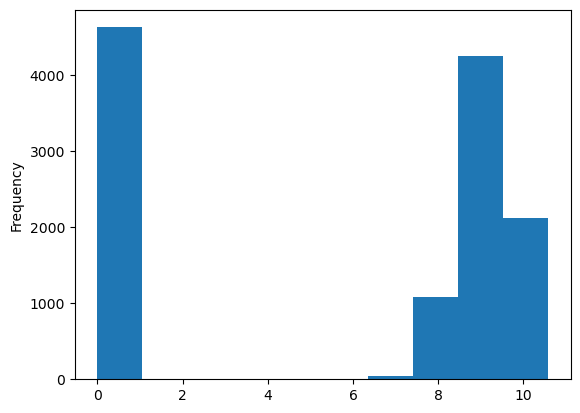

In [196]:
df['LOG_PROPERTY_INSURANCE_AMT'].plot(kind='hist')
df['LOG_PROPERTY_INSURANCE_AMT'].skew()

The Log-transformed distribution is bimodal with a spike at zero, and many values are exactly zero, this suggests a zero-inflated distribution — a common situation in real-world financial or insurance data.

Since PROPERTY_INSURANCE_AMT column data doesn't provide any numerical continuity, lets convert it into categorical variable. 
Customers with property insurance and without insurance

In [200]:
df['HAS_INSURANCE'] = (df['PROPERTY_INSURANCE_AMT'] > 0).astype(int)

In [202]:
df.head()

,ever60_24m_StrictFlag,Max_dependent,LTV,Doc_form_16,income_sum,income_min,edu_max,edu_min,age_max,age_min,cnt_coapplicant,REQUESTED_TENURE,PROPERTY_INSURANCE_AMT,Organization_type,SALARIED_SELF,CHANNEL_CODE,City_tier,Loan_sub_type_1,SAL_FLAG,emi_income_sum,All_No_of_TL,All_open_TL,All_Vin_bureau,All_min_Vin_bureau,All_Delq_TL_24_M,No_of_enq_All,Latest_Bureau_prd,Bureau_TL,LTV_capped,LTV_sq,income_sum_q_capped,LOG_income_sum_q_capped,LOG_income_sum,LOG_PROPERTY_INSURANCE_AMT,HAS_INSURANCE
0,0,0,0.715563,0,11396.0000,0.0,3,2,46,24,1,240.0,4553.0,3.Private Ltd Co,SALARIED,DSA,1,Builder Ready,SAL,0.456037,4,2,32,2,0,8,CC,2.<6 CC,0.715563,0.512031,11396.0000,9.341105,9.341105,8.423761,1
1,0,2,0.544463,0,26472.0833,0.0,3,3,47,44,1,180.0,10307.0,3.Private Ltd Co,SELF_EMP,DSA,3,Self Construction,NONSAL,0.472611,3,1,65,19,2,3,HL,7.<36 AL HL LAS,0.544463,0.296440,26472.0833,10.183884,10.183884,9.240676,1
2,0,6,0.566012,0,23487.5000,0.0,3,3,35,35,1,240.0,7460.0,3.Private Ltd Co,SELF_EMP,CROSS SALES,3,Self Construction,NONSAL,0.486684,2,2,47,37,0,2,BL_PSL,12.>36 PL TWL GL,0.566012,0.320369,23487.5000,10.064266,10.064266,8.917445,1
3,0,0,0.536455,0,42270.0000,0.0,3,3,39,34,1,240.0,6744.0,1.Others,SALARIED,DSA,1,Builder UNC,SAL,0.447599,2,1,94,69,0,2,AL,13.>36 Others,0.536455,0.287784,42270.0000,10.651857,10.651857,8.816557,1
4,0,1,0.511949,0,17506.0000,0.0,3,3,32,28,1,324.0,0.0,3.Private Ltd Co,SALARIED,UBL Sales,1,Builder Ready,SAL,0.619159,1,0,87,87,0,2,CC,11.>36 CC,0.511949,0.262092,17506.0000,9.770356,9.770356,0.000000,0


income_min

2.3869432119397307

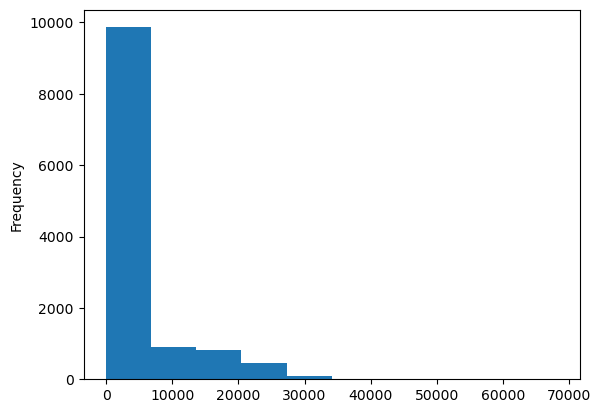

In [205]:
df['income_min'].plot(kind='hist')
df['income_min'].skew()

In [207]:
#Checking percentage of zeros in minimum income

zero_percentage = (df['income_min'] == 0).mean() * 100
zero_percentage

80.21082104916412

In [209]:
#High percentage of zeros means mostly minimum income is unknown data, hence we are removing the column

df.drop(columns=['income_min'], inplace=True)

All_Vin_bureau

1.1854869060545614

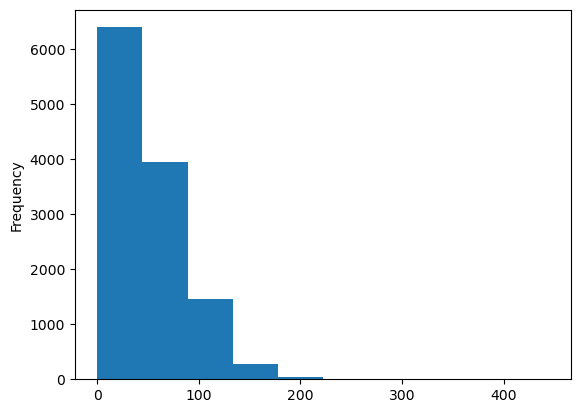

In [212]:
df['All_Vin_bureau'].plot(kind = 'hist')
df['All_Vin_bureau'].skew()

In [214]:
df['All_Vin_bureau'].corr(df['ever60_24m_StrictFlag'])

-0.005938637054348405

In [216]:
df[['All_Vin_bureau', 'All_min_Vin_bureau']].corr() 

,All_Vin_bureau,All_min_Vin_bureau
All_Vin_bureau,1.000000,0.378082
All_min_Vin_bureau,0.378082,1.000000


In [218]:
df[['All_Vin_bureau', 'ever60_24m_StrictFlag']].corr()

,All_Vin_bureau,ever60_24m_StrictFlag
All_Vin_bureau,1.000000,-0.005939
ever60_24m_StrictFlag,-0.005939,1.000000


Dropping All_Vin_bureau & All_min_Vin_bureau columns as they donot provide any significance in modeling

In [221]:
df.head()

,ever60_24m_StrictFlag,Max_dependent,LTV,Doc_form_16,income_sum,edu_max,edu_min,age_max,age_min,cnt_coapplicant,REQUESTED_TENURE,PROPERTY_INSURANCE_AMT,Organization_type,SALARIED_SELF,CHANNEL_CODE,City_tier,Loan_sub_type_1,SAL_FLAG,emi_income_sum,All_No_of_TL,All_open_TL,All_Vin_bureau,All_min_Vin_bureau,All_Delq_TL_24_M,No_of_enq_All,Latest_Bureau_prd,Bureau_TL,LTV_capped,LTV_sq,income_sum_q_capped,LOG_income_sum_q_capped,LOG_income_sum,LOG_PROPERTY_INSURANCE_AMT,HAS_INSURANCE
0,0,0,0.715563,0,11396.0000,3,2,46,24,1,240.0,4553.0,3.Private Ltd Co,SALARIED,DSA,1,Builder Ready,SAL,0.456037,4,2,32,2,0,8,CC,2.<6 CC,0.715563,0.512031,11396.0000,9.341105,9.341105,8.423761,1
1,0,2,0.544463,0,26472.0833,3,3,47,44,1,180.0,10307.0,3.Private Ltd Co,SELF_EMP,DSA,3,Self Construction,NONSAL,0.472611,3,1,65,19,2,3,HL,7.<36 AL HL LAS,0.544463,0.296440,26472.0833,10.183884,10.183884,9.240676,1
2,0,6,0.566012,0,23487.5000,3,3,35,35,1,240.0,7460.0,3.Private Ltd Co,SELF_EMP,CROSS SALES,3,Self Construction,NONSAL,0.486684,2,2,47,37,0,2,BL_PSL,12.>36 PL TWL GL,0.566012,0.320369,23487.5000,10.064266,10.064266,8.917445,1
3,0,0,0.536455,0,42270.0000,3,3,39,34,1,240.0,6744.0,1.Others,SALARIED,DSA,1,Builder UNC,SAL,0.447599,2,1,94,69,0,2,AL,13.>36 Others,0.536455,0.287784,42270.0000,10.651857,10.651857,8.816557,1
4,0,1,0.511949,0,17506.0000,3,3,32,28,1,324.0,0.0,3.Private Ltd Co,SALARIED,UBL Sales,1,Builder Ready,SAL,0.619159,1,0,87,87,0,2,CC,11.>36 CC,0.511949,0.262092,17506.0000,9.770356,9.770356,0.000000,0


Dropping raw data and keeping transformed data

In [224]:
df.drop(columns = ['LTV','income_sum','PROPERTY_INSURANCE_AMT','All_Vin_bureau','All_min_Vin_bureau','LTV_capped','income_sum_q_capped','LOG_income_sum_q_capped','LOG_PROPERTY_INSURANCE_AMT'],axis = 1, inplace = True)

In [226]:
df

,ever60_24m_StrictFlag,Max_dependent,Doc_form_16,edu_max,edu_min,age_max,age_min,cnt_coapplicant,REQUESTED_TENURE,Organization_type,SALARIED_SELF,CHANNEL_CODE,City_tier,Loan_sub_type_1,SAL_FLAG,emi_income_sum,All_No_of_TL,All_open_TL,All_Delq_TL_24_M,No_of_enq_All,Latest_Bureau_prd,Bureau_TL,LTV_sq,LOG_income_sum,HAS_INSURANCE
0,0,0,0,3,2,46,24,1,240.0,3.Private Ltd Co,SALARIED,DSA,1,Builder Ready,SAL,0.456037,4,2,0,8,CC,2.<6 CC,0.512031,9.341105,1
1,0,2,0,3,3,47,44,1,180.0,3.Private Ltd Co,SELF_EMP,DSA,3,Self Construction,NONSAL,0.472611,3,1,2,3,HL,7.<36 AL HL LAS,0.296440,10.183884,1
2,0,6,0,3,3,35,35,1,240.0,3.Private Ltd Co,SELF_EMP,CROSS SALES,3,Self Construction,NONSAL,0.486684,2,2,0,2,BL_PSL,12.>36 PL TWL GL,0.320369,10.064266,1
3,0,0,0,3,3,39,34,1,240.0,1.Others,SALARIED,DSA,1,Builder UNC,SAL,0.447599,2,1,0,2,AL,13.>36 Others,0.287784,10.651857,1
4,0,1,0,3,3,32,28,1,324.0,3.Private Ltd Co,SALARIED,UBL Sales,1,Builder Ready,SAL,0.619159,1,0,0,2,CC,11.>36 CC,0.262092,9.770356,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13404,0,3,0,3,2,29,29,1,240.0,4.Public Ltd. Co.,SALARIED,CROSS SALES,1,Resale Ready,SAL,0.307412,1,0,0,3,CL,13.>36 Others,0.635559,10.626266,1
13405,0,1,0,3,3,32,31,1,240.0,3.Private Ltd Co,SALARIED,DSA,3,Builder Ready,SAL,0.460021,4,2,0,7,CL,4.<6 BL CL Oth,0.639659,11.032613,0
13406,0,0,0,2,2,50,46,1,180.0,3.Private Ltd Co,SELF_EMP,UBL Sales,2,Resale Ready,NONSAL,0.440446,1,1,0,1,HL,13.>36 Others,0.256174,10.329333,1
13407,0,0,0,2,2,50,46,1,156.0,3.Private Ltd Co,SELF_EMP,UBL Sales,2,Resale Ready,NONSAL,0.145836,1,1,0,1,HL,13.>36 Others,0.024047,10.329333,0


In [228]:
df.head()

,ever60_24m_StrictFlag,Max_dependent,Doc_form_16,edu_max,edu_min,age_max,age_min,cnt_coapplicant,REQUESTED_TENURE,Organization_type,SALARIED_SELF,CHANNEL_CODE,City_tier,Loan_sub_type_1,SAL_FLAG,emi_income_sum,All_No_of_TL,All_open_TL,All_Delq_TL_24_M,No_of_enq_All,Latest_Bureau_prd,Bureau_TL,LTV_sq,LOG_income_sum,HAS_INSURANCE
0,0,0,0,3,2,46,24,1,240.0,3.Private Ltd Co,SALARIED,DSA,1,Builder Ready,SAL,0.456037,4,2,0,8,CC,2.<6 CC,0.512031,9.341105,1
1,0,2,0,3,3,47,44,1,180.0,3.Private Ltd Co,SELF_EMP,DSA,3,Self Construction,NONSAL,0.472611,3,1,2,3,HL,7.<36 AL HL LAS,0.296440,10.183884,1
2,0,6,0,3,3,35,35,1,240.0,3.Private Ltd Co,SELF_EMP,CROSS SALES,3,Self Construction,NONSAL,0.486684,2,2,0,2,BL_PSL,12.>36 PL TWL GL,0.320369,10.064266,1
3,0,0,0,3,3,39,34,1,240.0,1.Others,SALARIED,DSA,1,Builder UNC,SAL,0.447599,2,1,0,2,AL,13.>36 Others,0.287784,10.651857,1
4,0,1,0,3,3,32,28,1,324.0,3.Private Ltd Co,SALARIED,UBL Sales,1,Builder Ready,SAL,0.619159,1,0,0,2,CC,11.>36 CC,0.262092,9.770356,0


In [230]:
df.columns

Index(['ever60_24m_StrictFlag', 'Max_dependent', 'Doc_form_16', 'edu_max',
       'edu_min', 'age_max', 'age_min', 'cnt_coapplicant', 'REQUESTED_TENURE',
       'Organization_type', 'SALARIED_SELF', 'CHANNEL_CODE', 'City_tier',
       'Loan_sub_type_1', 'SAL_FLAG', 'emi_income_sum', 'All_No_of_TL',
       'All_open_TL', 'All_Delq_TL_24_M', 'No_of_enq_All', 'Latest_Bureau_prd',
       'Bureau_TL', 'LTV_sq', 'LOG_income_sum', 'HAS_INSURANCE'],
      dtype='object')

In [232]:
cat_int_cols = [col for col in df.select_dtypes(include = ['int']).columns if df[col].nunique() < 15 and col != 'ever60_24m_StrictFlag']
for col in cat_int_cols:
    print(f"{col} : {df[col].unique()}")

Doc_form_16 : [0 1]
edu_max : [3 4 1 2]
edu_min : [2 3 1 4]
cnt_coapplicant : [1 0 2 3 4]
City_tier : [1 3 2]
All_Delq_TL_24_M : [ 0  2  1  4  5  3 10  7  6 13  8 15 11 14]
HAS_INSURANCE : [1 0]


In [234]:
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols = list(cat_cols)
cat_cols

['Organization_type',
 'SALARIED_SELF',
 'CHANNEL_CODE',
 'Loan_sub_type_1',
 'SAL_FLAG',
 'Latest_Bureau_prd',
 'Bureau_TL']

In [236]:
combined_cat_cols = df[cat_cols + cat_int_cols].columns

In [238]:
combined_cat_cols.nunique()

14

In [240]:
for col in df[combined_cat_cols]:  
    print(f"\nColumn : {col}")
    print(f"Unique values ({df[col].nunique()}): ")
    print(df[col].unique())


Column : Organization_type
Unique values (5): 
['3.Private Ltd Co' '1.Others' '5.MNC' '4.Public Ltd. Co.' '2.Govt']

Column : SALARIED_SELF
Unique values (3): 
['SALARIED' 'SELF_EMP' 'OTHERS']

Column : CHANNEL_CODE
Unique values (8): 
['DSA' 'CROSS SALES' 'UBL Sales' 'ALTERNATE CHANNELS' 'DIRECT' 'IBM'
 'Open Market sales' 'DIGITAL CIRCLE']

Column : Loan_sub_type_1
Unique values (5): 
['Builder Ready' 'Self Construction' 'Builder UNC' 'Resale Ready'
 'Others+P_Cons']

Column : SAL_FLAG
Unique values (2): 
['SAL' 'NONSAL']

Column : Latest_Bureau_prd
Unique values (12): 
['CC' 'HL' 'BL_PSL' 'AL' 'CL' 'Others' 'TWL' 'BL' 'PL' 'GL' 'OD/EL' 'LAS']

Column : Bureau_TL
Unique values (12): 
['2.<6 CC' '7.<36 AL HL LAS' '12.>36 PL TWL GL' '13.>36 Others'
 '11.>36 CC' '10.<36 Others' '9.<36 CC' '4.<6 BL CL Oth' '8.<36 TWL GL'
 '6.<36 PL' '5.<6 Others' '3.<6 PL']

Column : Doc_form_16
Unique values (2): 
[0 1]

Column : edu_max
Unique values (4): 
[3 4 1 2]

Column : edu_min
Unique values (4)

In [242]:
num_cols = df.select_dtypes(include = ['number']).columns.difference(cat_int_cols)
num_cols = list(num_cols)
num_cols

['All_No_of_TL',
 'All_open_TL',
 'LOG_income_sum',
 'LTV_sq',
 'Max_dependent',
 'No_of_enq_All',
 'REQUESTED_TENURE',
 'age_max',
 'age_min',
 'emi_income_sum',
 'ever60_24m_StrictFlag']

<Axes: >

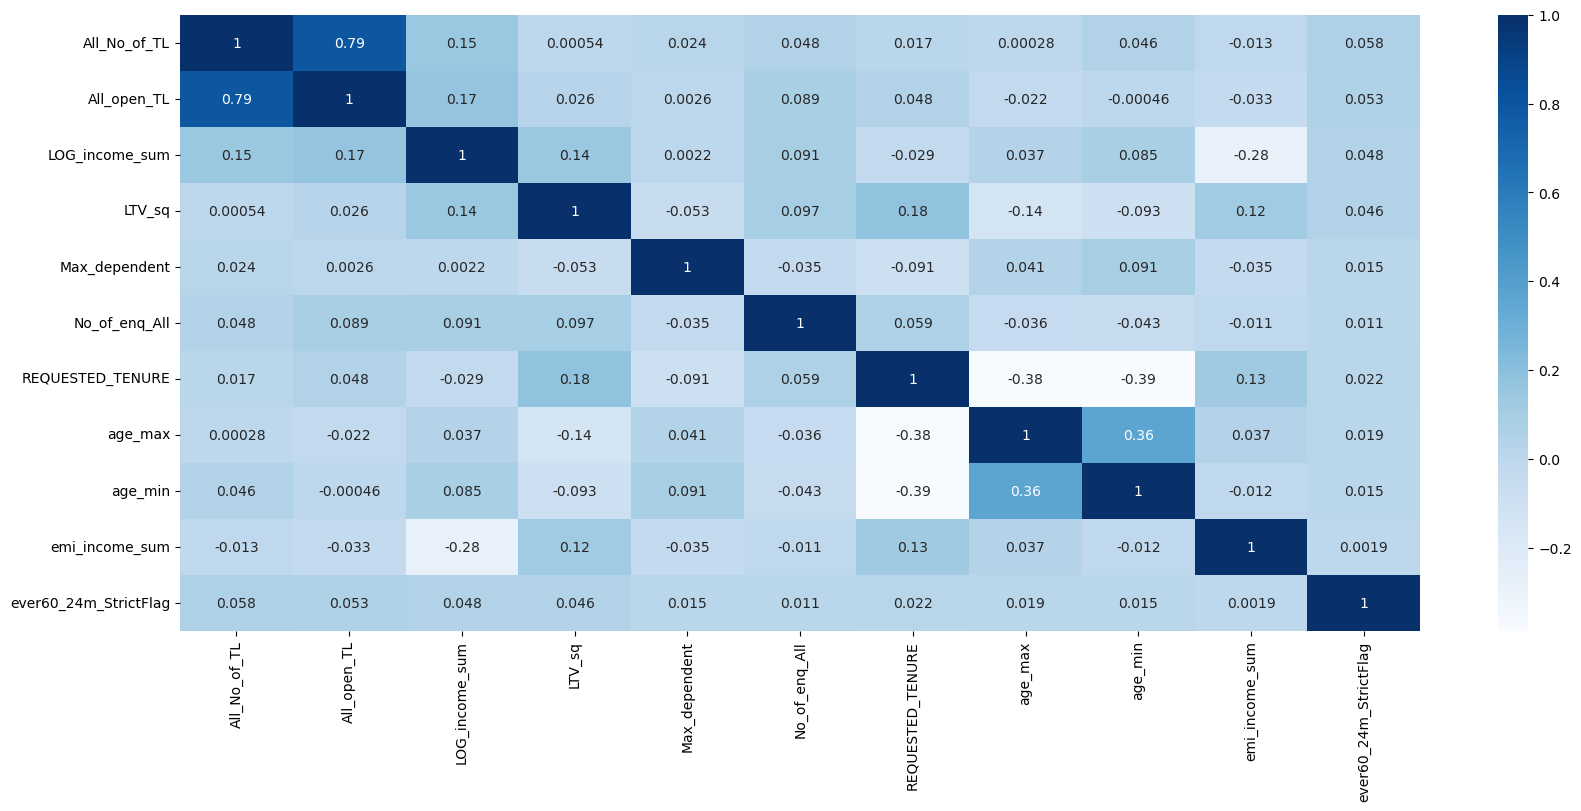

In [244]:
plt.figure(figsize=(20,8))
sns.heatmap(df[num_cols].corr(),annot=True, cmap = 'Blues')

FEATURE ENCODING

Categorical Columns

Column : Organization_type

In [251]:
from sklearn import preprocessing

In [253]:
label_encoder = preprocessing.LabelEncoder()
df['Organization_type']= label_encoder.fit_transform(df['Organization_type'])
df['Organization_type'].unique()

array([2, 0, 4, 3, 1])

Column : SALARIED_SELF

In [257]:
pd.crosstab(df['SALARIED_SELF'],df['SAL_FLAG'])

SAL_FLAG,NONSAL,SAL
SALARIED_SELF,,
OTHERS,55,0
SALARIED,0,6766
SELF_EMP,5322,0


In [259]:
#Dropping SALARIED_SELF since there's a perfect mapping between the SALARIED_SELF column and SAL_FLAG:

df.drop(['SALARIED_SELF'], axis=1, inplace=True)

Column : CHANNEL_CODE

In [263]:
#Grouping CHANNEL_CODE

def simplify_CHANNEL_CODE(x):
    if x in ['CROSS SALES','DIRECT','IBM']:
        return 'Low Risk'
    elif x in ['UBL Sales','DSA']:
        return 'Medium Risk'
    else:
        return 'High Risk'

df['CHANNEL_CODE_GROUPED'] = df['CHANNEL_CODE'].apply(simplify_CHANNEL_CODE)

In [265]:
label_encoder = preprocessing.LabelEncoder()
df['CHANNEL_CODE_GROUPED']= label_encoder.fit_transform(df['CHANNEL_CODE_GROUPED'])
df['CHANNEL_CODE_GROUPED'].unique()

array([2, 1, 0])

In [267]:
df.drop(['CHANNEL_CODE'],axis = 1, inplace = True)

Column : Loan_sub_type_1

In [271]:
label_encoder = preprocessing.LabelEncoder()
df['Loan_sub_type_1']= label_encoder.fit_transform(df['Loan_sub_type_1'])
df['Loan_sub_type_1'].unique()

array([0, 4, 1, 3, 2])

In [273]:
df['Loan_sub_type_1'].value_counts().sort_values(ascending= False)

Loan_sub_type_1
0    4203
1    3400
3    2531
4    1581
2     428
Name: count, dtype: int64

In [275]:
print(label_encoder.classes_)

['Builder Ready' 'Builder UNC' 'Others+P_Cons' 'Resale Ready'
 'Self Construction']


Column : SAL_FLAG

In [279]:
#Binary encoding

df['SAL_FLAG'] = df['SAL_FLAG'].map({'SAL': 1, 'NONSAL': 0})

Column : Latest_Bureau_prd and Bureau_TL

In [283]:
pd.crosstab(df['Latest_Bureau_prd'],df['Bureau_TL'])

Bureau_TL,10.<36 Others,11.>36 CC,12.>36 PL TWL GL,13.>36 Others,2.<6 CC,3.<6 PL,4.<6 BL CL Oth,5.<6 Others,6.<36 PL,7.<36 AL HL LAS,8.<36 TWL GL,9.<36 CC
Latest_Bureau_prd,,,,,,,,,,,,
AL,0,0,0,240,0,0,0,94,0,495,0,0
BL,106,0,0,45,0,0,45,0,0,0,0,0
BL_PSL,0,0,103,0,0,0,0,135,0,0,223,0
CC,0,350,0,0,767,0,0,0,0,0,0,1474
CL,1599,0,0,194,0,0,906,0,0,0,0,0
GL,0,0,54,0,0,0,0,493,0,0,601,0
HL,0,0,0,206,0,0,0,57,0,327,0,0
LAS,0,0,0,3,0,0,0,2,0,11,0,0
OD/EL,11,0,0,43,0,0,0,1,0,0,0,0


In [285]:
cramers_v(df['Latest_Bureau_prd'],df['Bureau_TL'])

0.5764905738702648

In [287]:
#Dropping Bureau_TL since there's a perfect mapping between the Bureau_TL column and Latest_Bureau_prd:

df.drop(['Bureau_TL'], axis=1, inplace=True)

In [289]:
def simplify_bureau_product(x):
    if x in ['CC', 'PL', 'CL']:
        return 'Unsecured'
    elif x in ['HL', 'AL', 'TWL', 'GL', 'LAS']:
        return 'Secured'
    else:
        return 'Other'

df['Bureau_prd_grouped'] = df['Latest_Bureau_prd'].apply(simplify_bureau_product)

In [291]:
label_encoder = preprocessing.LabelEncoder()
df['Bureau_prd_grouped']= label_encoder.fit_transform(df['Bureau_prd_grouped'])
df['Bureau_prd_grouped'].unique()

array([2, 1, 0])

In [293]:
df.drop(['Latest_Bureau_prd'],axis = 1, inplace = True)

Column : edu_max and edu_min

In [297]:
pd.crosstab(df['edu_max'],df['edu_min'])

edu_min,1,2,3,4
edu_max,,,,
1,1010,0,0,0
2,391,2348,0,0
3,761,1901,4097,0
4,211,287,763,374


In [299]:
cramers_v(df['edu_max'],df['edu_min'])

0.5423550698379771

In [301]:
#Dropping edu_min as we can consider education of primary applicant as important

In [303]:
df.drop(['edu_min'], axis = 1, inplace = True)

Column : cnt_coapplicant

In [307]:
df['cnt_coapplicant'].value_counts()

cnt_coapplicant
1    11606
2      404
0       69
3       58
4        6
Name: count, dtype: int64

In [309]:
df['has_coapplicant'] = df['cnt_coapplicant'].apply(lambda x: 0 if x == 0 else 1)

In [311]:
df.drop(['cnt_coapplicant'], axis = 1, inplace = True)

Column : All_Delq_TL_24_M

In [315]:
df['All_Delq_TL_24_M'].value_counts()

All_Delq_TL_24_M
0     9619
1     1924
2      397
3      119
4       49
5       16
7        9
6        4
10       1
13       1
8        1
15       1
11       1
14       1
Name: count, dtype: int64

In [317]:
df['has_delinquency'] = df['All_Delq_TL_24_M'].apply(lambda x: 0 if x == 0 else 1)

In [319]:
df.drop(['All_Delq_TL_24_M'], axis = 1, inplace = True)

Discrete or ordinal numerical features

No_of_enq_All, REQUESTED_TENURE, age_max, All_No_of_TL, age_min, All_open_TL, All_Delq_TL_24_M, Max_dependent   

Column : No_of_enq_All 

In [325]:
df['No_of_enq_All'].value_counts()

No_of_enq_All
1     1875
2     1862
3     1481
4     1187
5      922
      ... 
41       1
99       1
61       1
53       1
71       1
Name: count, Length: 67, dtype: int64

In [327]:
#Data Value distribution and their count

df['No_of_enq_All'].value_counts().sort_index()

No_of_enq_All
-11111     814
 1        1875
 2        1862
 3        1481
 4        1187
          ... 
 79          1
 81          1
 99          1
 100         1
 115         1
Name: count, Length: 67, dtype: int64

In [329]:
#Replacing -11111 values with nan

df['No_of_enq_All'].replace(-11111,np.nan,inplace=True)
df['No_of_enq_All'].value_counts().sort_index()

No_of_enq_All
1.0      1875
2.0      1862
3.0      1481
4.0      1187
5.0       922
         ... 
79.0        1
81.0        1
99.0        1
100.0       1
115.0       1
Name: count, Length: 66, dtype: int64

<Axes: ylabel='Frequency'>

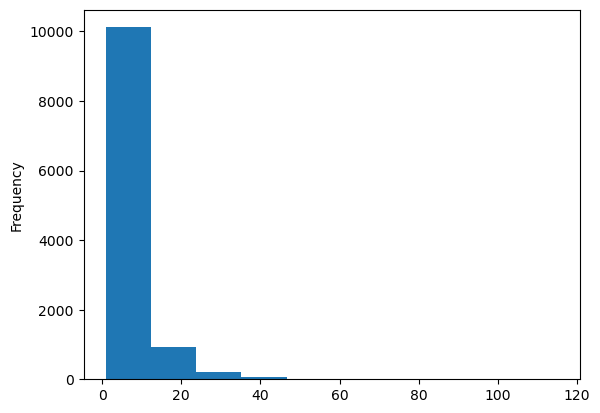

In [331]:
df['No_of_enq_All'].plot(kind = 'hist')

In [333]:
df['No_of_enq_All'].isna().sum()

814

In [335]:
#Binning 

def enquiry_risk_bin(x):
    if pd.isna(x) or x == 0:
        return 'No Risk'
    elif x <= 5:
        return 'Low Risk'
    elif x <= 10:
        return 'Moderate Risk'   
    else:
        return 'High Risk'

df['enquiry_risk'] = df['No_of_enq_All'].apply(enquiry_risk_bin)

In [337]:
label_encoder = preprocessing.LabelEncoder()
df['enquiry_risk']= label_encoder.fit_transform(df['enquiry_risk'])
df['enquiry_risk'].unique()

array([2, 1, 0, 3])

In [374]:
df.drop(['No_of_enq_All'], axis = 1, inplace = True)

Column : REQUESTED_TENURE

In [341]:
df['REQUESTED_TENURE'].head()

0    240.0
1    180.0
2    240.0
3    240.0
4    324.0
Name: REQUESTED_TENURE, dtype: float64

In [343]:
df['REQUESTED_TENURE'] = (df['REQUESTED_TENURE']/12).round(0)

In [345]:
df['REQUESTED_TENURE'].value_counts().sort_index()

REQUESTED_TENURE
3.0        3
4.0       12
5.0       50
6.0       35
7.0       87
8.0       91
9.0       79
10.0     511
11.0     106
12.0     234
13.0     190
14.0     185
15.0    1549
16.0     201
17.0     221
18.0     294
19.0     227
20.0    5176
21.0      99
22.0     158
23.0     160
24.0     129
25.0    1166
26.0      86
27.0     107
28.0      96
29.0      75
30.0     816
Name: count, dtype: int64

Columns : age_max & age_min

0.5778253696208892

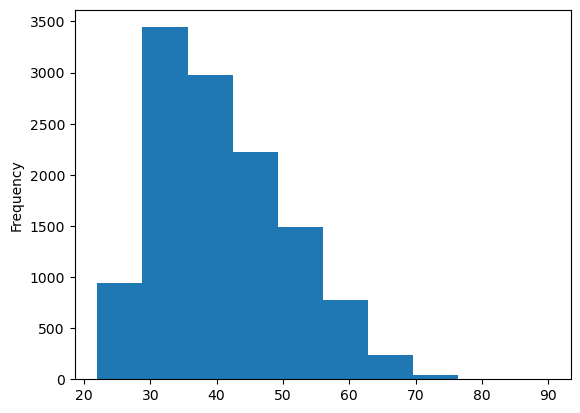

In [349]:
df['age_max'].plot(kind = 'hist')
df['age_max'].skew()

0.7277184318453149

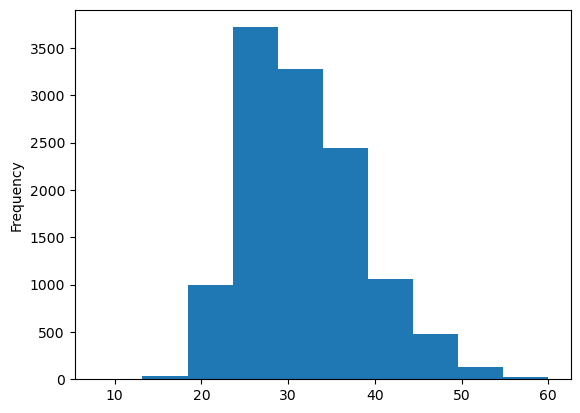

In [351]:
df['age_min'].plot(kind = 'hist')
df['age_min'].skew()

Both age_max and age_min indicate moderate skewness which is safe for age features

Column :  Max_dependent 

In [356]:
df['Max_dependent'].unique()

array([ 0,  2,  6,  1,  3,  5,  4, 33,  9, 10,  8, 29,  7, 23, 52],
      dtype=int64)

In [358]:
df['Max_dependent'].value_counts().sort_index()

Max_dependent
0     4833
1     2115
2     3311
3     1409
4      373
5       79
6       14
7        2
8        1
9        1
10       1
23       1
29       1
33       1
52       1
Name: count, dtype: int64

In [360]:
df['Max_dependent_capped'] = df['Max_dependent'].apply(lambda x : x if x <= 5 else 5 )

In [362]:
def dependent_category(x):
    if x == 0:
        return 'None'
    elif x <= 2:
        return 'Low'
    elif x <= 4:
        return 'Medium'
    else:
        return 'High'

df['dependent_band'] = df['Max_dependent_capped'].apply(dependent_category)

In [364]:
label_encoder = preprocessing.LabelEncoder()

df['dependent_band_encoded'] = label_encoder.fit_transform(df['dependent_band'])

In [378]:
df.drop(['Max_dependent_capped','dependent_band'],axis = 1, inplace = True)

In [387]:
df.drop(['Max_dependent'],axis = 1, inplace = True)

Column : All_No_of_TL

In [412]:
df['All_No_of_TL'].value_counts().sort_index()

All_No_of_TL
1      4190
2      2431
3      1587
4       996
5       720
6       553
7       385
8       298
9       195
10      148
11      126
12       84
13       71
14       65
15       49
16       39
17       41
18       19
19       15
20       24
21       12
22        5
23       12
24       10
25        5
26        6
27        7
28        5
29        3
30        5
31        4
32        3
33        4
34        1
35        1
36        3
37        3
38        2
40        2
41        1
43        1
44        1
46        1
48        1
50        1
51        1
52        1
72        2
100       1
113       1
131       1
304       1
Name: count, dtype: int64

In [414]:
df['no_of_loans'] = pd.cut(x=df['All_No_of_TL'], bins=[1,2,4,8,304],labels=['2','3-4','5-8','9+'])

In [492]:
df['no_of_loans'].value_counts().sort_index()

no_of_loans
0    4190
1    2431
2    2583
3    1956
4     983
Name: count, dtype: int64

In [420]:
df['no_of_loans'].isna().sum()

4190

In [434]:
df['no_of_loans']=df['no_of_loans'].astype('object')
df['no_of_loans'].fillna('1',inplace=True)

In [454]:
label_encoder = preprocessing.LabelEncoder()

df['no_of_loans'] = label_encoder.fit_transform(df['no_of_loans'])

In [436]:
df['All_open_TL'].value_counts().sort_index()

All_open_TL
0      2379
1      4609
2      2291
3      1176
4       726
5       393
6       218
7       142
8        75
9        48
10       27
11       16
12       17
13        8
14        5
15        1
16        1
17        1
18        3
19        1
21        1
22        1
23        1
24        1
29        1
159       1
Name: count, dtype: int64

In [438]:
df['no_of_active_loans'] = pd.cut(x=df['All_open_TL'], bins=[0,1,2,4,159],labels=['1','1-2','2-4','4+'])

In [448]:
df['no_of_active_loans']=df['no_of_active_loans'].astype('object')
df['no_of_active_loans'].fillna('0',inplace=True)

In [456]:
label_encoder = preprocessing.LabelEncoder()

df['no_of_active_loans'] = label_encoder.fit_transform(df['no_of_active_loans'])

In [440]:
df['no_of_active_loans'].value_counts()

no_of_active_loans
1      4609
1-2    2291
2-4    1902
4+      962
Name: count, dtype: int64

In [442]:
df.drop(['All_No_of_TL','All_open_TL'], axis = 1, inplace = True)

Column : emi_income_sum

-0.3947100998352144

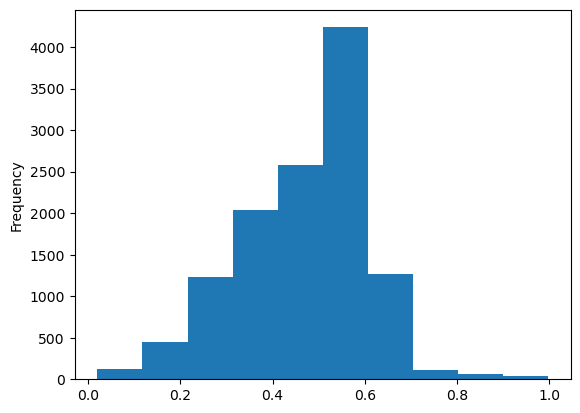

In [460]:
df['emi_income_sum'].plot(kind = 'hist')
df['emi_income_sum'].skew()

In [500]:
#Using Z score for identifying outliers

from scipy.stats import zscore
emi_income_z = zscore(df['emi_income_sum'])
upper = df['emi_income_sum'].mean() + 3*(df['emi_income_sum'].std())
lower = df['emi_income_sum'].mean() - 3*(df['emi_income_sum'].std())
print(f"Upper limit : {upper}")
print(f"Lower limit : {lower}")
emi_income_outlier = (emi_income_z.abs() > 3).astype(int)  #Flags outlier into boolean 1 as outlier and 0 as normal


Upper limit : 0.8936726830782096
Lower limit : 0.05291073352328918


In [502]:
emi_income_outlier.value_counts()

emi_income_sum
0    12082
1       61
Name: count, dtype: int64

It shows there are very few extreme values and emi_income_sum is an important feature whose outliers are  good for modeling

Creating new feature 

In [468]:
#New feature showing if the values are outlier or not

df['emi_income_risk_flag'] = emi_income_outlier.astype(int)

In [470]:
#New Feature :  financial stress or debt burden

df['emi_stress_score'] = df['emi_income_sum'] / df['LOG_income_sum']

<Axes: xlabel='emi_stress_score', ylabel='Count'>

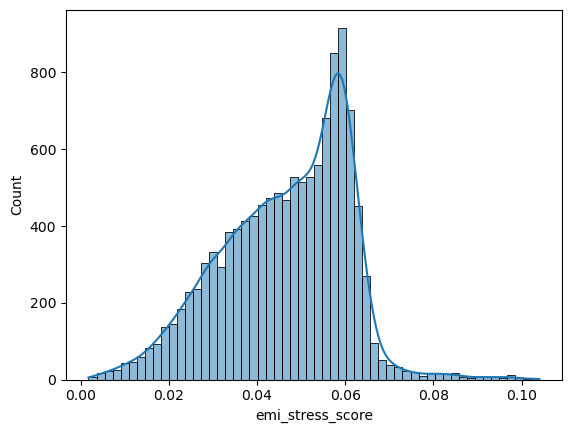

In [472]:
sns.histplot(df['emi_stress_score'], kde = True)

<Axes: xlabel='emi_stress_score'>

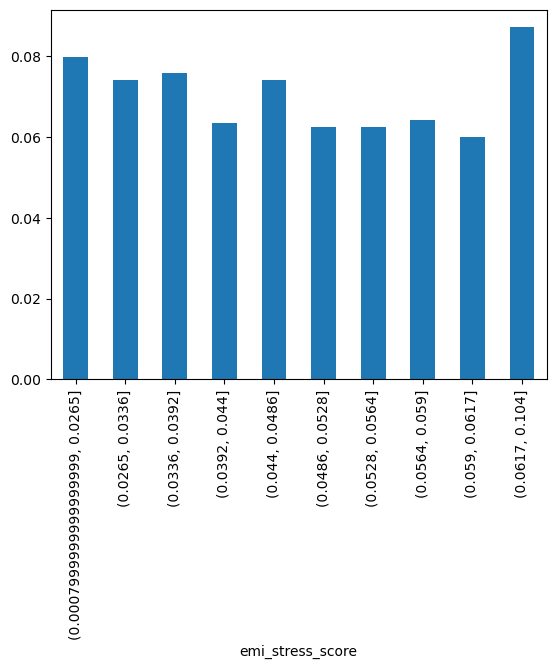

In [474]:
#quantile-based discretization 

emi_stress_score_bin = pd.qcut(df['emi_stress_score'], q=10)
df.groupby(emi_stress_score_bin)['ever60_24m_StrictFlag'].mean().plot(kind='bar')

In [476]:
emi_stress_threshold = df['emi_stress_score'].quantile(0.9)
emi_stress_threshold

0.06174102060459954

In [478]:
df['emi_stress_flag'] = (df['emi_stress_score'] > 0.0617).astype(int)

In [504]:
df.drop(['emi_stress_score'], axis = 1, inplace = True)

In [506]:
df

,ever60_24m_StrictFlag,Doc_form_16,edu_max,age_max,age_min,REQUESTED_TENURE,Organization_type,City_tier,Loan_sub_type_1,SAL_FLAG,emi_income_sum,LTV_sq,LOG_income_sum,HAS_INSURANCE,CHANNEL_CODE_GROUPED,Bureau_prd_grouped,has_coapplicant,has_delinquency,enquiry_risk,dependent_band_encoded,no_of_loans,no_of_active_loans,emi_income_risk_flag,emi_stress_flag
0,0,0,3,46,24,20.0,2,1,0,1,0.456037,0.512031,9.341105,1,2,2,1,0,2,3,2,2,0,0
1,0,0,3,47,44,15.0,2,3,4,0,0.472611,0.296440,10.183884,1,2,1,1,1,1,1,2,1,0,0
2,0,0,3,35,35,20.0,2,3,4,0,0.486684,0.320369,10.064266,1,1,0,1,0,1,0,1,2,0,0
3,0,0,3,39,34,20.0,0,1,1,1,0.447599,0.287784,10.651857,1,2,1,1,0,1,3,1,1,0,0
4,0,0,3,32,28,27.0,2,1,0,1,0.619159,0.262092,9.770356,0,2,2,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13404,0,0,3,29,29,20.0,3,1,3,1,0.307412,0.635559,10.626266,1,1,2,1,0,1,2,0,0,0,0
13405,0,0,3,32,31,20.0,2,3,0,1,0.460021,0.639659,11.032613,0,2,2,1,0,2,1,2,2,0,0
13406,0,0,2,50,46,15.0,2,2,3,0,0.440446,0.256174,10.329333,1,2,1,1,0,1,3,0,1,0,0
13407,0,0,2,50,46,13.0,2,2,3,0,0.145836,0.024047,10.329333,0,2,1,1,0,1,3,0,1,0,0


In [482]:
df.shape

(12143, 25)

In [508]:
df.to_csv('preprocessed_credit_data.csv', index=False)